In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, total_stellar_mass, metals_density_profile, histmetals_density_profile, halfmass_rad_stars

redshift=0

In [2]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]

In [3]:
import warnings
warnings.filterwarnings('ignore')

# z=0.7 parameters
# 2 -> 4 Gyr
# 4 -> 6 Gyr
# -11 -> -11.5
PSB_selection = (median_age<=4)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.5)
intermediate_quiescent_selection = (median_age>4)&(median_age<=6)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.5)
old_quiescent_selection = (median_age>6)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-11.5)
quiescent_selection = (np.log10(newbin_current_SFR/10**(total_mass))<=-11.5)

# [Fe/H]

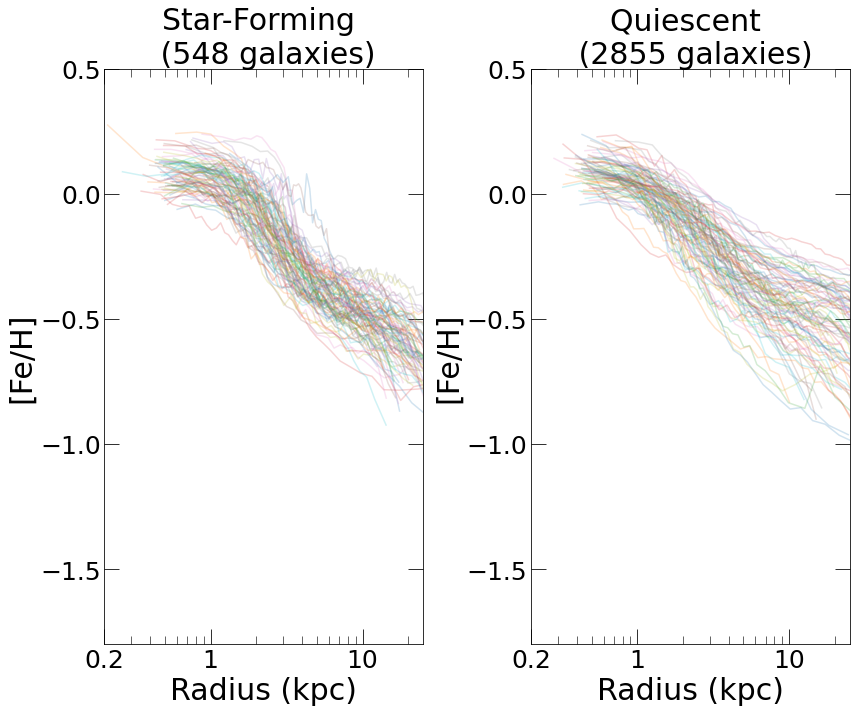

In [4]:
#metallicity profiles
f, (ax1, ax4) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(12, 10))
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

#z=2 star-forming galaxies
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    yy, metallicity, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    ax1.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
# radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
# for i in range(1, (n_bins+1)):
#     radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_metallicity, 'median', bins=radial_percentiles)
# ax1.plot(np.array(radial_percentiles[1:]), np.log10(np.array(statistic)), c='blue', linewidth=5, label='median')

# fit line to star-forming galaxies
# def func(x, a, b, c):
#     return a*np.log10(x+b) + c
# popt, pcov = curve_fit(func, radial_percentiles[1:], statistic)
# label = str(popt[0]) + '*log(x+' + str(popt[1]) + ') + ' + str(popt[2])
# ax1.plot(np.array(radial_percentiles[1:]), np.log10(func(radial_percentiles[1:], *popt)), 'b--', linewidth=2, label=label)
# ax1.legend()

ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_xlim(0.2, 25)
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlabel("Radius (kpc)", fontsize=fts)
ax1.set_ylabel('[Fe/H]', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

#z=2 old quiescent galaxies
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    yy, metallicity, xx, R = metals_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    ax4.plot(xx[1:-2], yy[1:-2], alpha = 0.2)
# radial_percentiles = np.zeros(n_bins + 1) #N+1 for N percentiles 
# for i in range(1, (n_bins+1)):
#     radial_percentiles[i] = np.percentile(distance, (100/n_bins)*i) 
# statistic, bin_edges, bin_number = scipy.stats.binned_statistic(distance, big_metallicity, 'median', bins=radial_percentiles)
# ax4.plot(np.array(radial_percentiles[1:]), np.log10(np.array(statistic)), c='red', linewidth=5)
ax4.set_title('Quiescent \n ('+str(len(quiescent_selection))+' galaxies)', fontsize=fts)
ax4.set_xlim(0.2, 25)
ax4.set_ylim(-1.8, 0.5)
ax4.set_xlabel("Radius (kpc)", fontsize=fts)
ax4.set_ylabel('[Fe/H]', fontsize=fts)
ax4.set_xscale('log')
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax4.set_xticks([0.2, 1, 10], minor=False)
ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

#plt.savefig('REU\profiles.png', dpi=400)

# Density

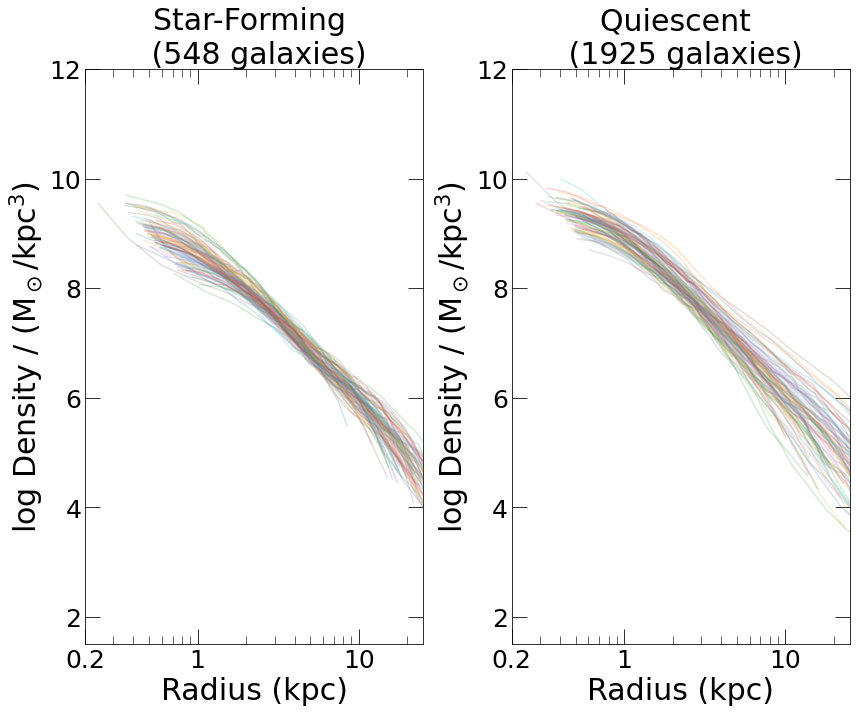

In [35]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(12, 10))
ax1 = axes[0]
ax4 = axes[1]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

# colormap = plt.get_cmap('rainbow_r')
# norm = colors.Normalize(vmin=10.5, vmax=12.0)

#z=2 star-forming galaxies
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    yy, logFeH, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    ax1.plot(percentiles[1:-2], np.log10(xx[1:-2]), alpha = 0.2)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

# #z=2 old quiescent galaxies
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    yy, logFeH, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    ax4.plot(percentiles[1:-2], np.log10(xx[1:-2]), alpha = 0.2)
ax4.set_title('Quiescent \n ('+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts)
ax4.set_ylim(1.5, 12)
ax4.set_xlim(0.2, 25)
ax4.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax4.set_xlabel('Radius (kpc)', fontsize=fts)
ax4.set_xscale('log')
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax4.set_xticks([0.2, 1, 10], minor=False)
ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

# plt.savefig('REU/irondensity.png', dpi=400)

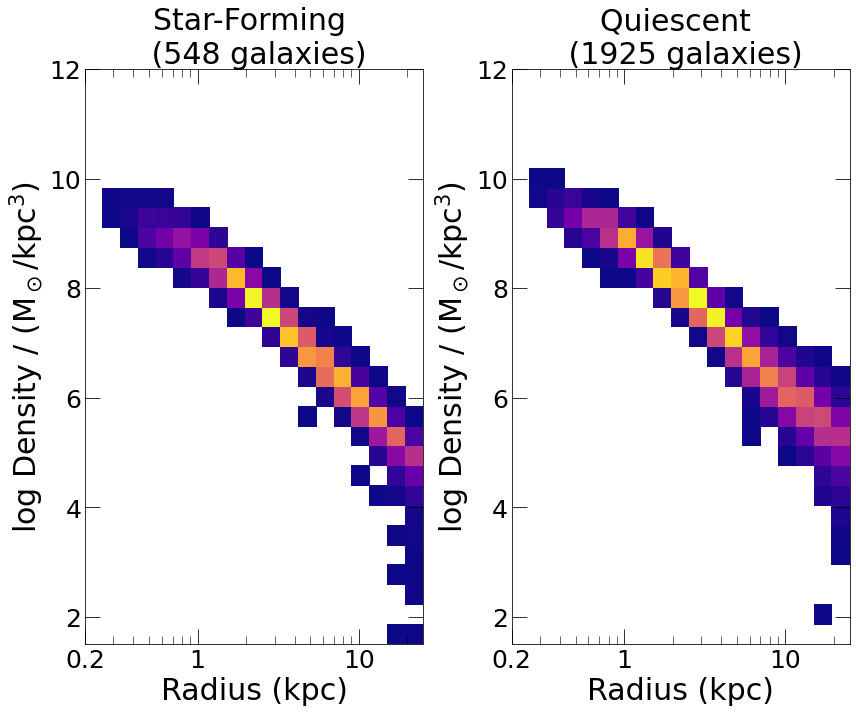

In [36]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(12, 10))
ax1 = axes[0]
ax4 = axes[1]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=200)

xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)

#z=2 star-forming galaxies
big_percentiles=[]
big_xx = []
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    yy, logFeH, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    big_percentiles = np.concatenate((big_percentiles, percentiles), axis=None)
    big_xx = np.concatenate((big_xx, np.log10(xx)), axis=None)
#     ax1.plot(percentiles[1:-2], np.log10(xx[1:-2]), alpha = 0.2)
h1, _, _ = np.histogram2d(big_percentiles, big_xx, bins=[xbins, ybins], density=False)    
h1[h1==0] = np.nan
color=colormap(norm(h1)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, h1.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

# #z=2 old quiescent galaxies
big_percentiles=[]
big_xx = []
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    yy, logFeH, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    big_percentiles = np.concatenate((big_percentiles, percentiles), axis=None)
    big_xx = np.concatenate((big_xx, np.log10(xx)), axis=None)
#     ax4.plot(percentiles[1:-2], np.log10(xx[1:-2]), alpha = 0.2)
h2, _, _ = np.histogram2d(big_percentiles, big_xx, bins=[xbins, ybins], density=False) 
h2[h2==0] = np.nan
color=colormap(norm(h2)).tolist()
color = tuple(color[0][:])
ax4.pcolormesh(xbins, ybins, h2.T, cmap='plasma', color=color, edgecolor=None)
ax4.set_title('Quiescent \n ('+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts)
ax4.set_ylim(1.5, 12)
ax4.set_xlim(0.2, 25)
ax4.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax4.set_xlabel('Radius (kpc)', fontsize=fts)
ax4.set_xscale('log')
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax4.set_xticks([0.2, 1, 10], minor=False)
ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

# plt.savefig('REU/irondensity.png', dpi=400)

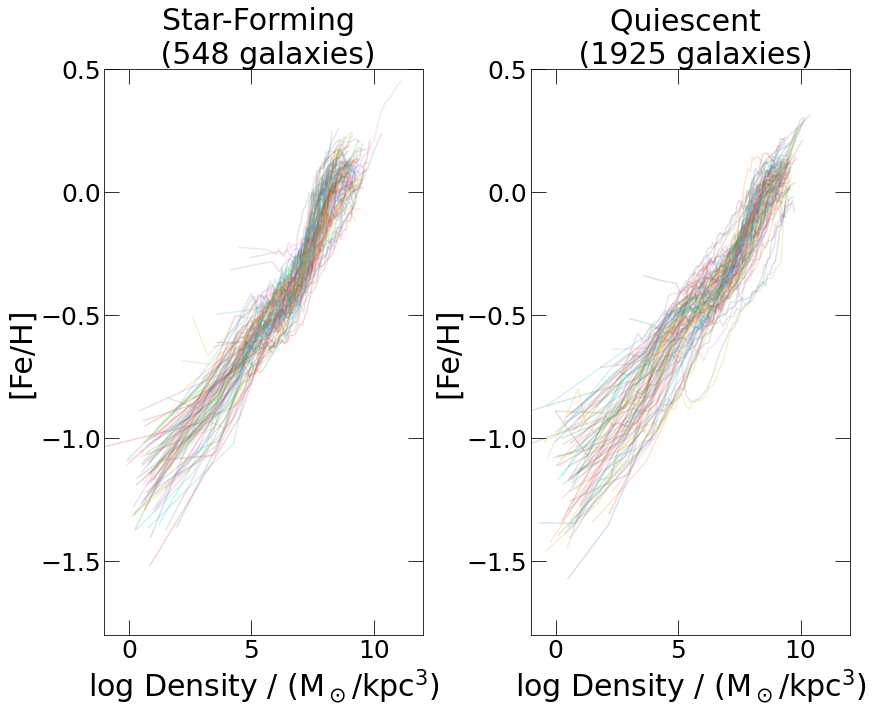

In [32]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(12, 10))
ax1 = axes[0]
ax4 = axes[1]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25

# colormap = plt.get_cmap('rainbow_r')
# norm = colors.Normalize(vmin=10.5, vmax=12.0)

#z=2 star-forming galaxies
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    yy, logFeH, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    ax1.plot(np.log10(xx), yy, alpha = 0.2)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_xlim(-1, 12)
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_ylabel('[Fe/H]', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax1.set_xticks([0.2, 1, 10], minor=False)
# ax1.set_xticklabels(['0.2', '1', '10'])

# #z=2 old quiescent galaxies
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    yy, logFeH, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    ax4.plot(np.log10(xx), yy, alpha = 0.2)
ax4.set_title('Quiescent \n ('+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts)
ax4.set_xlim(-1, 12)
ax4.set_ylim(-1.8, 0.5)
ax4.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax4.set_ylabel('[Fe/H]', fontsize=fts)
# ax4.set_xscale('log')
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax4.set_xticks([0.2, 1, 10], minor=False)
# ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

# plt.savefig('REU/irondensity.png', dpi=400)

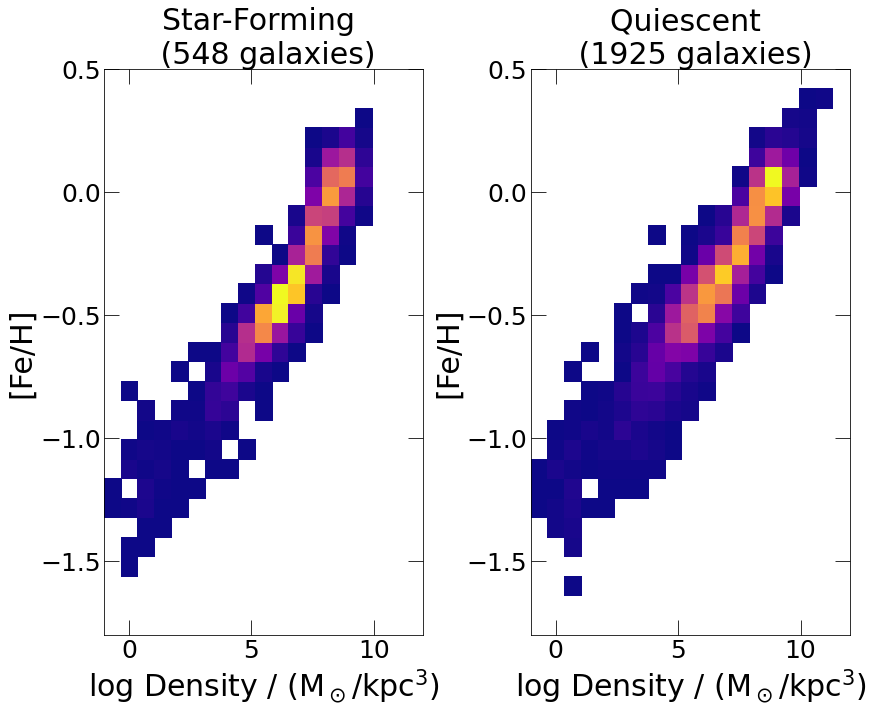

In [33]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 2, sharex='none', sharey='none', figsize=(12, 10))
ax1 = axes[0]
ax4 = axes[1]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

xbins = np.linspace(-1, 12, 20)
ybins = np.linspace(-1.8, 0.5, 30)

#z=2 star-forming galaxies
big_yy=[]
big_xx = []
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    yy, logFeH, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    big_yy = np.concatenate((big_yy, yy), axis=None)
    big_xx = np.concatenate((big_xx, np.log10(xx)), axis=None)
#     ax1.plot(np.log10(xx), yy, alpha = 0.2)
h1, _, _ = np.histogram2d(big_xx, big_yy, bins=[xbins, ybins], density=False)   
h1[h1==0] = np.nan
color=colormap(norm(h1)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, h1.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_xlim(-1, 12)
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_ylabel('[Fe/H]', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax1.set_xticks([0.2, 1, 10], minor=False)
# ax1.set_xticklabels(['0.2', '1', '10'])

# #z=2 old quiescent galaxies
big_yy=[]
big_xx = []
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    yy, logFeH, xx, R, percentiles = metals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    big_yy = np.concatenate((big_yy, yy), axis=None)
    big_xx = np.concatenate((big_xx, np.log10(xx)), axis=None)
#     ax4.plot(np.log10(xx), yy, alpha = 0.2)
h2, _, _ = np.histogram2d(big_xx, big_yy, bins=[xbins, ybins], density=False)  
h2[h2==0] = np.nan
color=colormap(norm(h2)).tolist()
color = tuple(color[0][:])
ax4.pcolormesh(xbins, ybins, h2.T, cmap='plasma', color=color, edgecolor=None)
ax4.set_title('Quiescent \n ('+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts)
ax4.set_xlim(-1, 12)
ax4.set_ylim(-1.8, 0.5)
ax4.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax4.set_ylabel('[Fe/H]', fontsize=fts)
# ax4.set_xscale('log')
ax4.tick_params(which='major', length=15)
ax4.tick_params(which='minor', length=8)
ax4.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax4.set_xticks([0.2, 1, 10], minor=False)
# ax4.set_xticklabels(['0.2', '1', '10'])

f.tight_layout()

# plt.savefig('REU/irondensity.png', dpi=400)

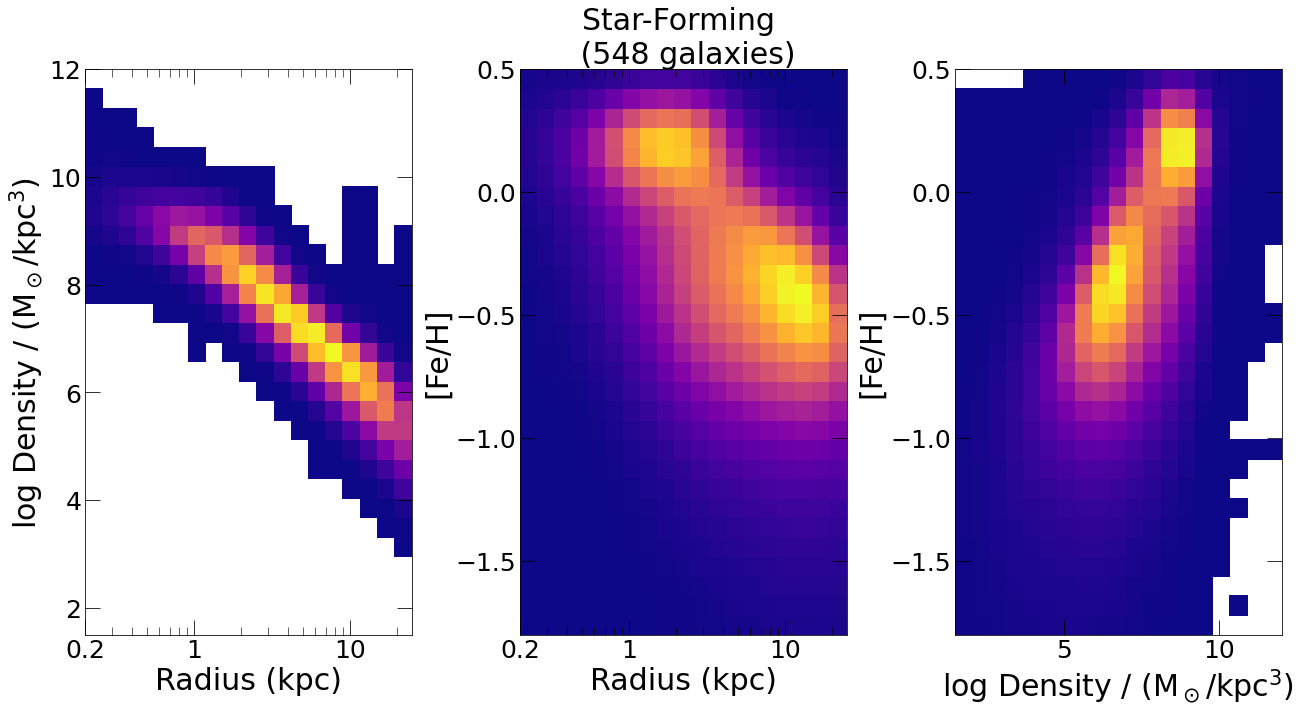

In [4]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(0.2, 25)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

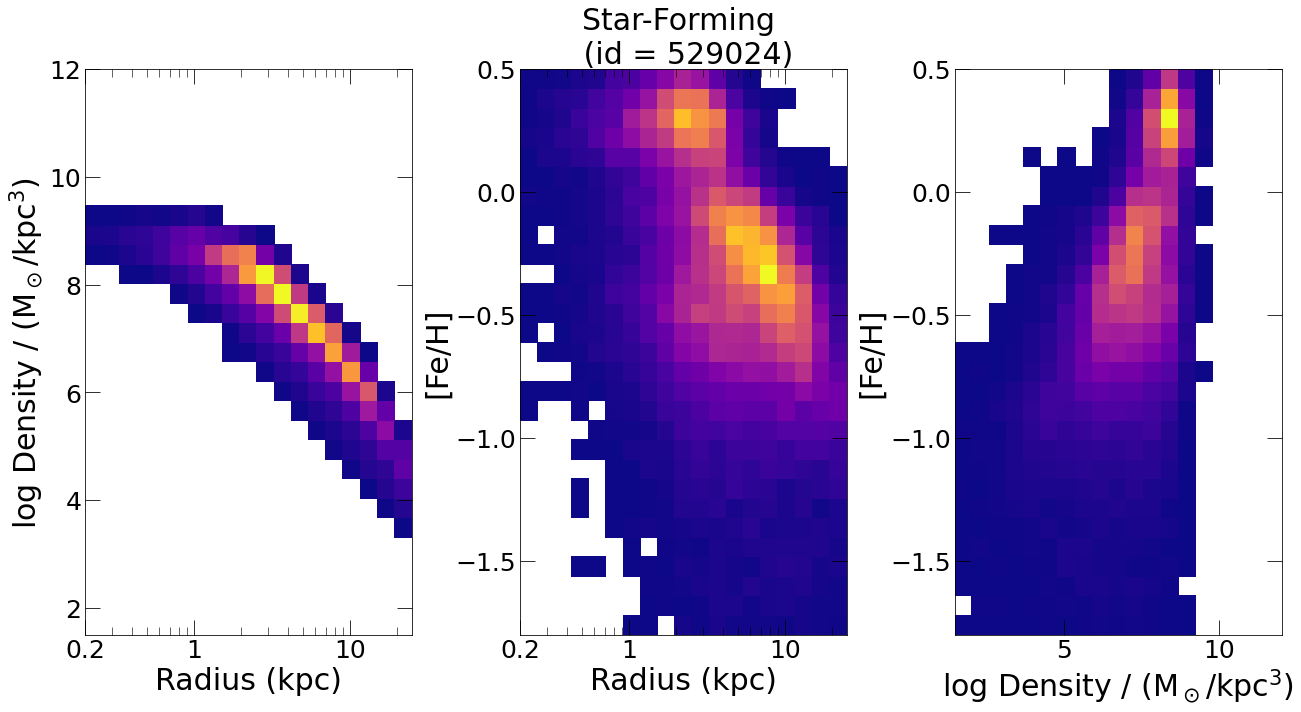

In [5]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 1, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
    number = id
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Star-Forming \n (id = '+str(number)+')', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(0.2, 25)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

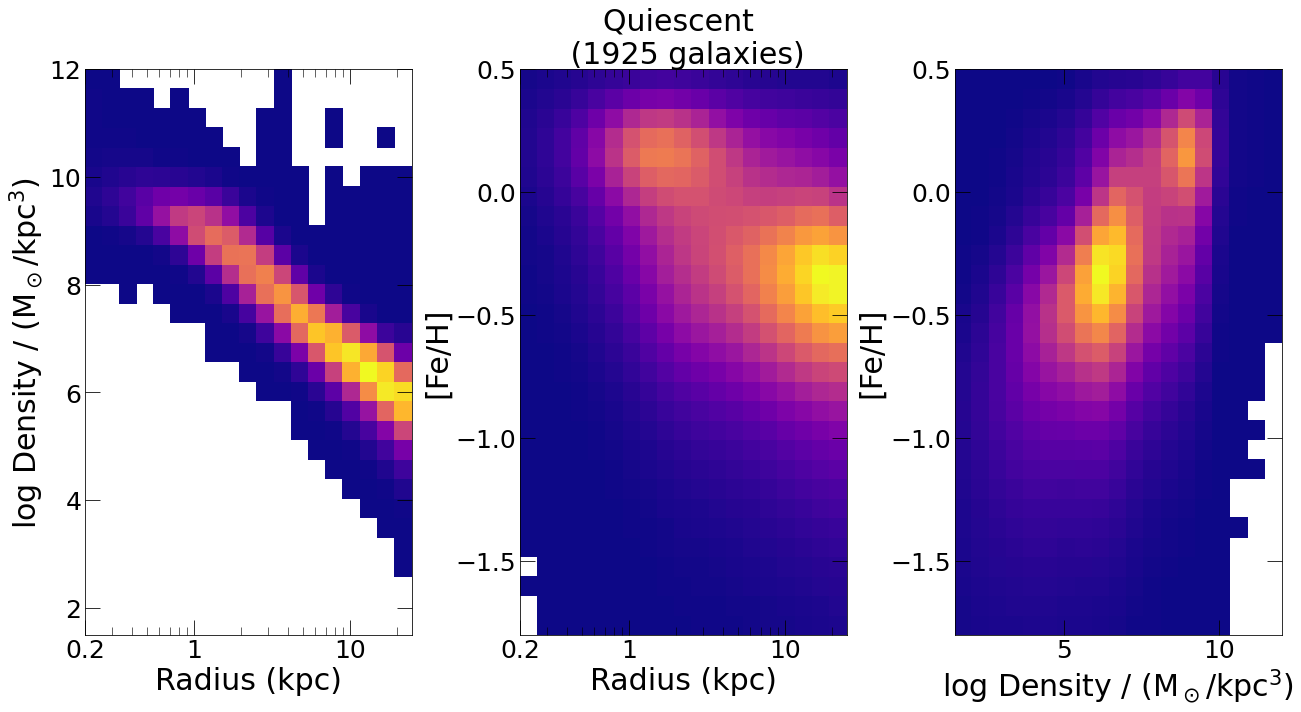

In [6]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Quiescent \n ('+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(0.2, 25)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

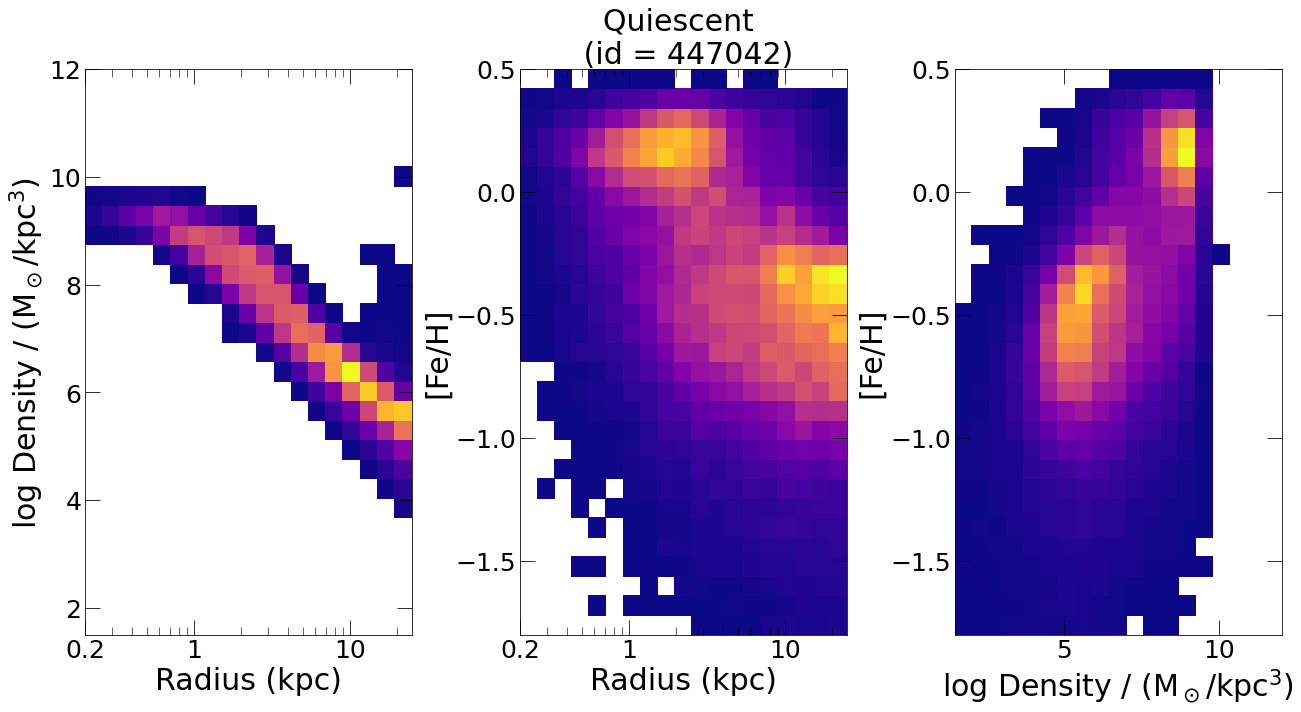

In [7]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 1, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
    number=id
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Quiescent \n (id = '+str(number)+')', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(0.2, 25)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

In [6]:
import os

rawdata_filename = os.path.join('redshift_'+str(redshift)+'_data', 'cutout_'+str(id)+'_redshift_'+str(redshift)+'_rawdata.hdf5')

with h5py.File(rawdata_filename, 'r') as f:
        starFormationTime = f['PartType4']['GFM_StellarFormationTime'][:]
        print(np.min(starFormationTime), np.max(starFormationTime))

0.06908572 0.88173705


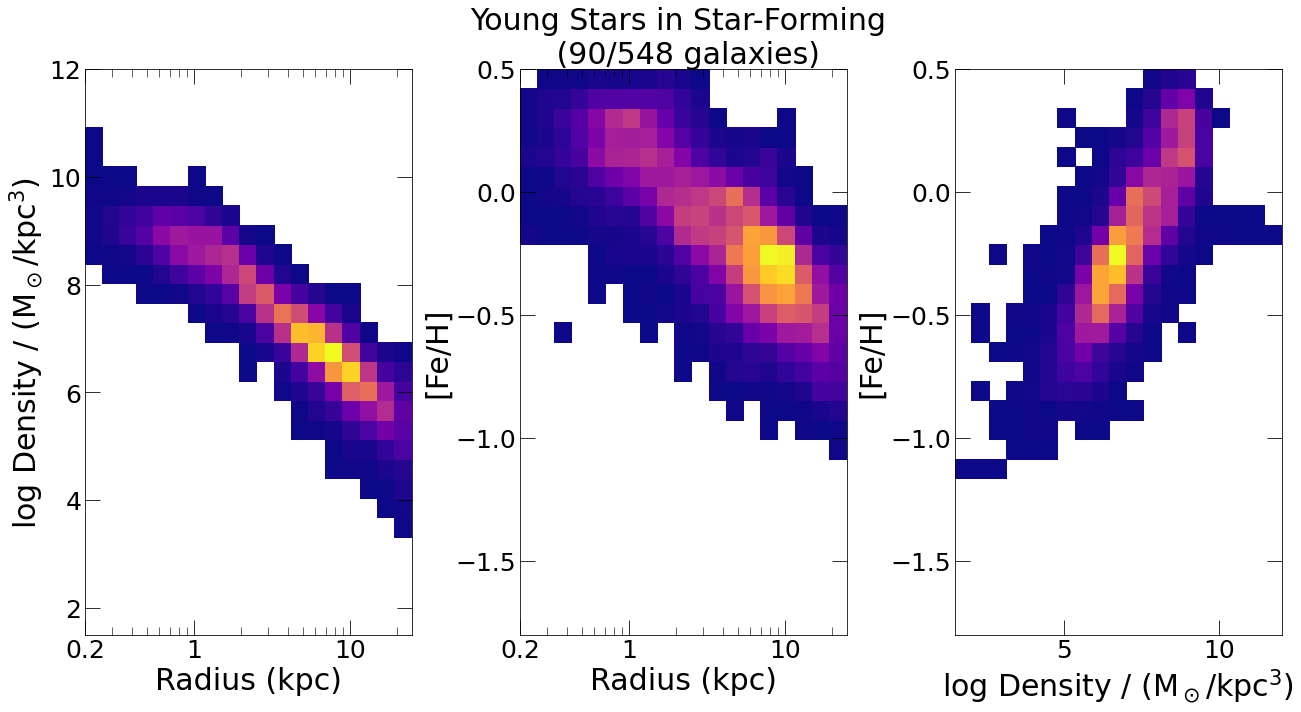

In [7]:
from matplotlib import colors
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

# quicker age calculation
starFormationTime = np.linspace(0, 1.0, 1000)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr
# print(starFormationTime)
# print(starFormationRedshift)
# print(starFormationGyr)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Young Stars in Star-Forming \n (90/'+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(0.2, 25)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

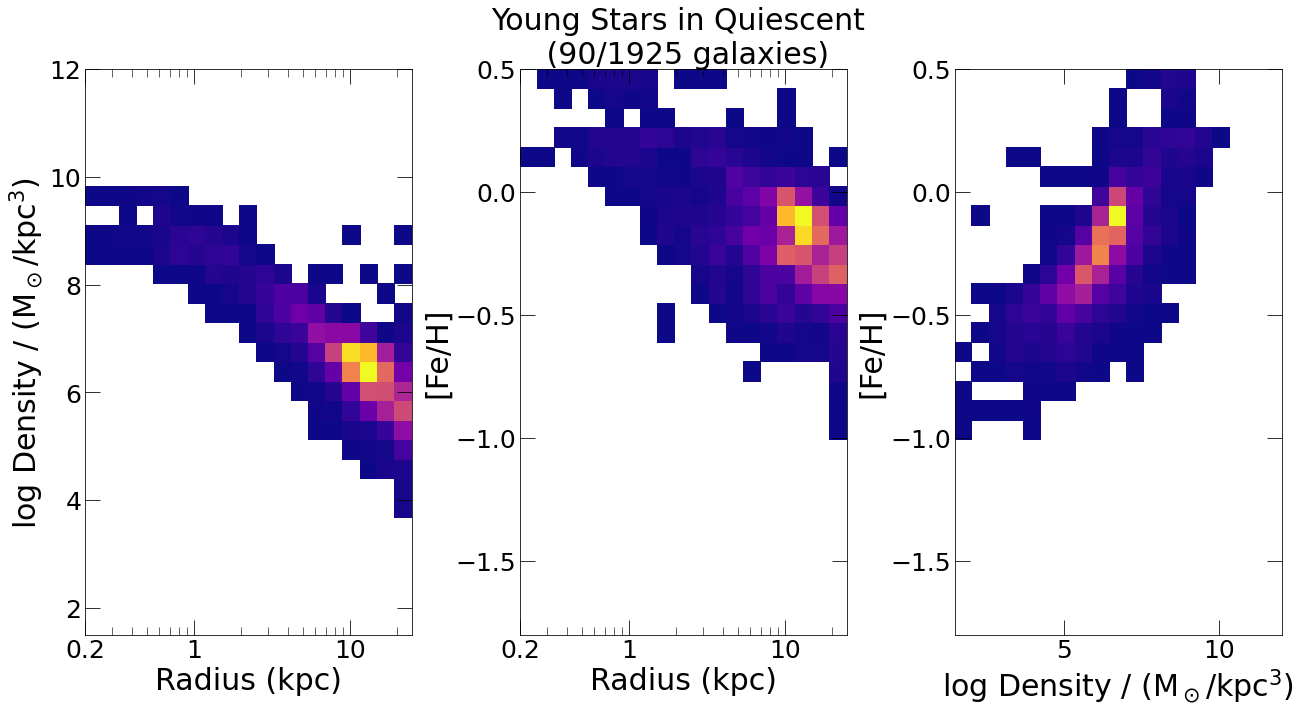

In [9]:
from matplotlib import colors
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

# quicker age calculation
starFormationTime = np.linspace(0, 1.0, 1000)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr
# print(starFormationTime)
# print(starFormationRedshift)
# print(starFormationGyr)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(0.2, 25)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)
ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_xticks([0.2, 1, 10], minor=False)
ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Young Stars in Quiescent \n (90/'+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(0.2, 25)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)
ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_xticks([0.2, 1, 10], minor=False)
ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

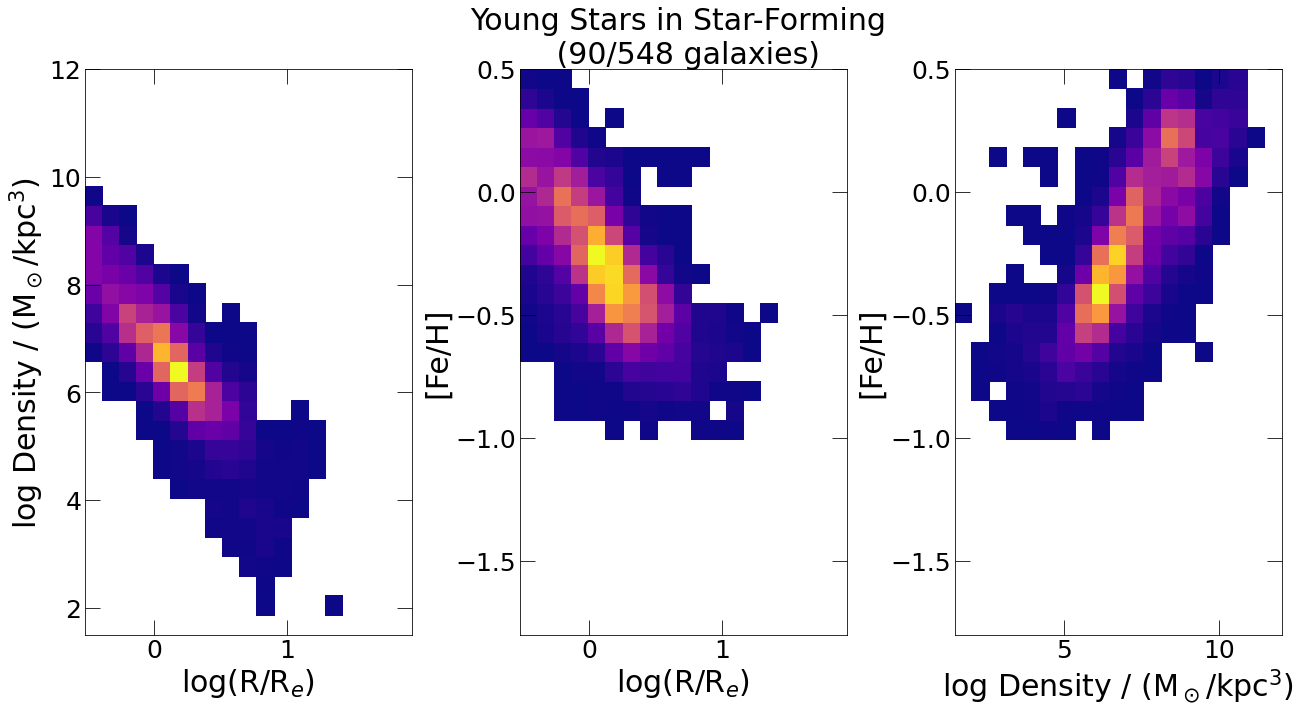

In [11]:
from matplotlib import colors
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

# quicker age calculation
starFormationTime = np.linspace(0, 1.0, 1000)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr
# print(starFormationTime)
# print(starFormationRedshift)
# print(starFormationGyr)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
    R_e = halfmass_rad_stars(id, redshift)
    h, _, _ = np.histogram2d(np.log10(R/R_e), np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(np.log10(R/R_e), logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(-0.52, 1.94)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax1.set_xticks([0.2, 1, 10], minor=False)
# ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Young Stars in Star-Forming \n (90/'+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax1.set_xlim(-0.52, 1.94)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)
# ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax2.set_xticks([0.2, 1, 10], minor=False)
# ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

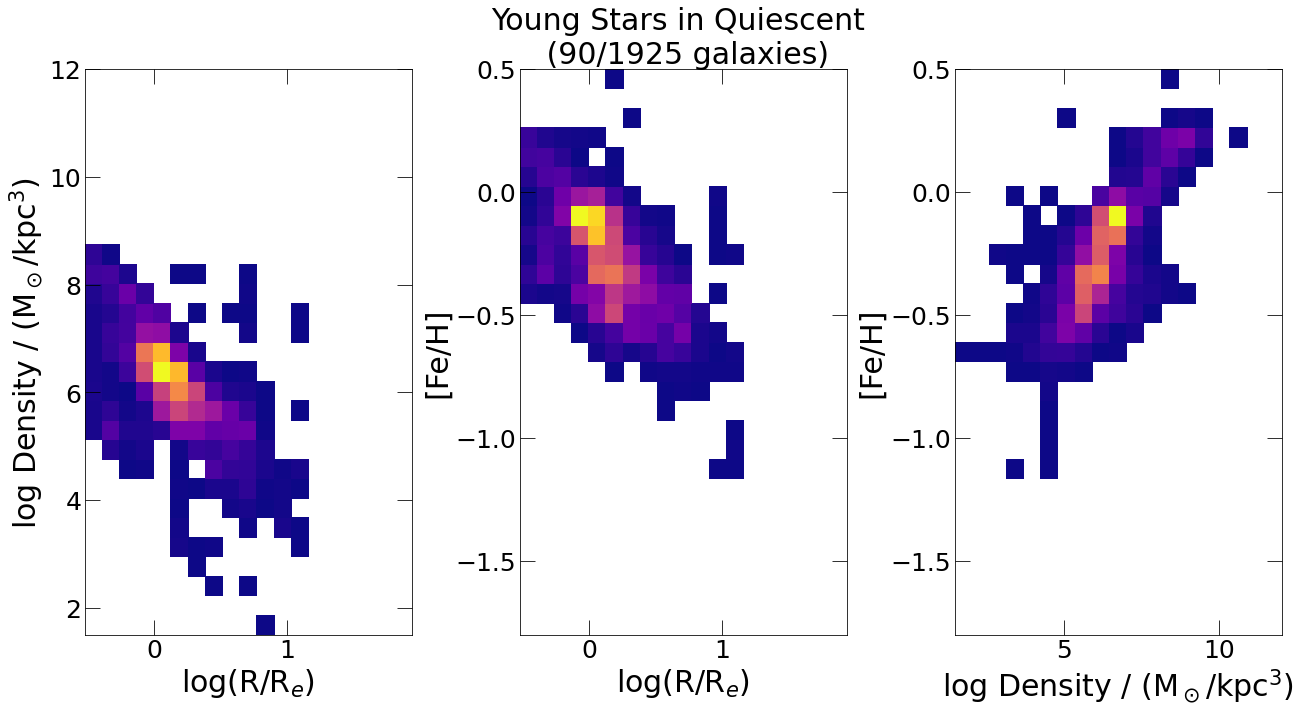

In [12]:
from matplotlib import colors
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

# quicker age calculation
starFormationTime = np.linspace(0, 1.0, 1000)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr
# print(starFormationTime)
# print(starFormationRedshift)
# print(starFormationGyr)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
    R_e = halfmass_rad_stars(id, redshift)
    h, _, _ = np.histogram2d(np.log10(R/R_e), np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(np.log10(R/R_e), logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(-0.52, 1.94)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax1.set_xticks([0.2, 1, 10], minor=False)
# ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Young Stars in Quiescent \n (90/'+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax1.set_xlim(-0.52, 1.94)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)
# ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax2.set_xticks([0.2, 1, 10], minor=False)
# ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

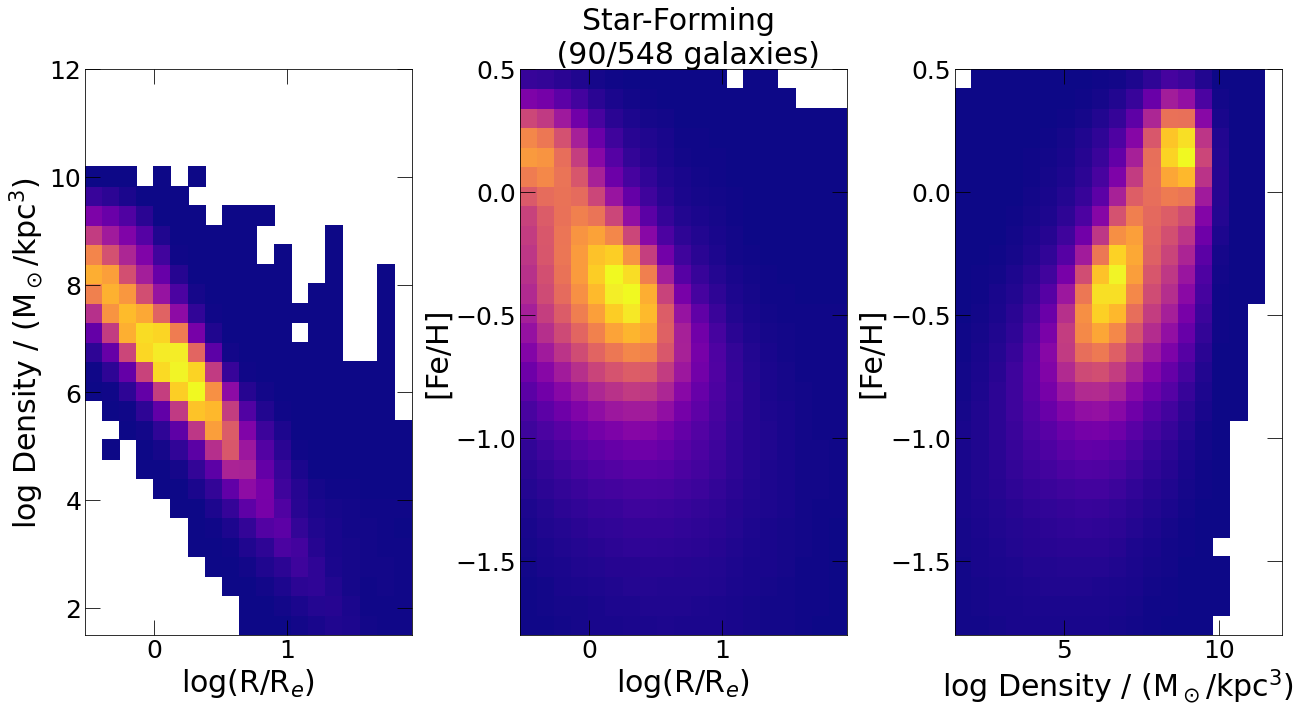

In [5]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

xbins = np.linspace(-0.52, 1.94, 20)
# xbins = np.logspace(np.log10(-0.52), np.log10(1.94), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    R_e = halfmass_rad_stars(id, redshift)
    h, _, _ = np.histogram2d(np.log10(R/R_e), np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(np.log10(R/R_e), logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(-0.52, 1.94)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax1.set_xticks([0.2, 1, 10], minor=False)
# ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Star-Forming \n (90/'+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(-0.52, 1.94)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)
# ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax2.set_xticks([0.2, 1, 10], minor=False)
# ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

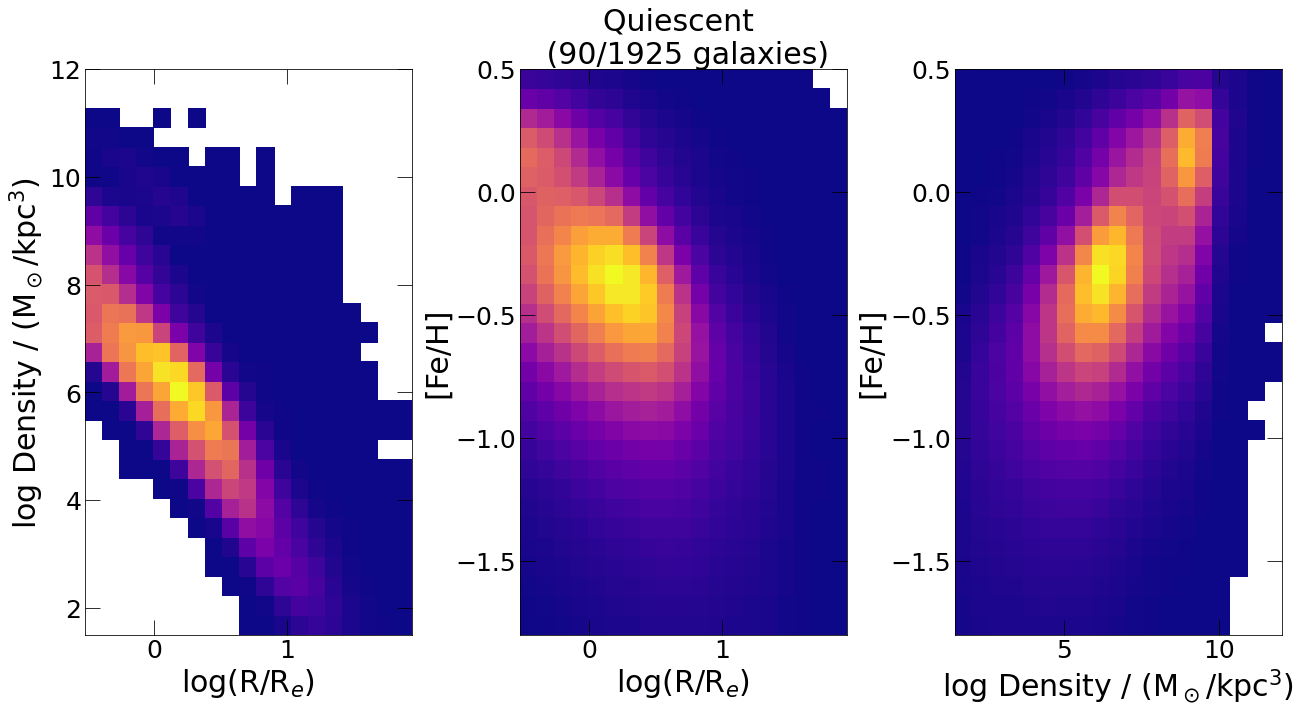

In [6]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 3, sharex='none', sharey='none', figsize=(18, 10), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

xbins = np.linspace(-0.52, 1.94, 20)
# xbins = np.logspace(np.log10(-0.52), np.log10(1.94), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    R_e = halfmass_rad_stars(id, redshift)
    h, _, _ = np.histogram2d(np.log10(R/R_e), np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(np.log10(R/R_e), logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(1.5, 12)
ax1.set_xlim(-0.52, 1.94)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax1.set_xticks([0.2, 1, 10], minor=False)
# ax1.set_xticklabels(['0.2', '1', '10'])

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_title('Quiescent \n (90/'+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts) #
ax2.set_ylim(-1.8, 0.5)
ax2.set_xlim(-0.52, 1.94)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)
# ax2.set_xscale('log')
ax2.tick_params(which='major', length=15)
ax2.tick_params(which='minor', length=8)
ax2.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
# ax2.set_xticks([0.2, 1, 10], minor=False)
# ax2.set_xticklabels(['0.2', '1', '10'])

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax3.set_xlim(1.5, 12)
ax3.set_ylim(-1.8, 0.5)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
# ax3.set_xscale('log')
ax3.tick_params(which='major', length=15)
ax3.tick_params(which='minor', length=8)
ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

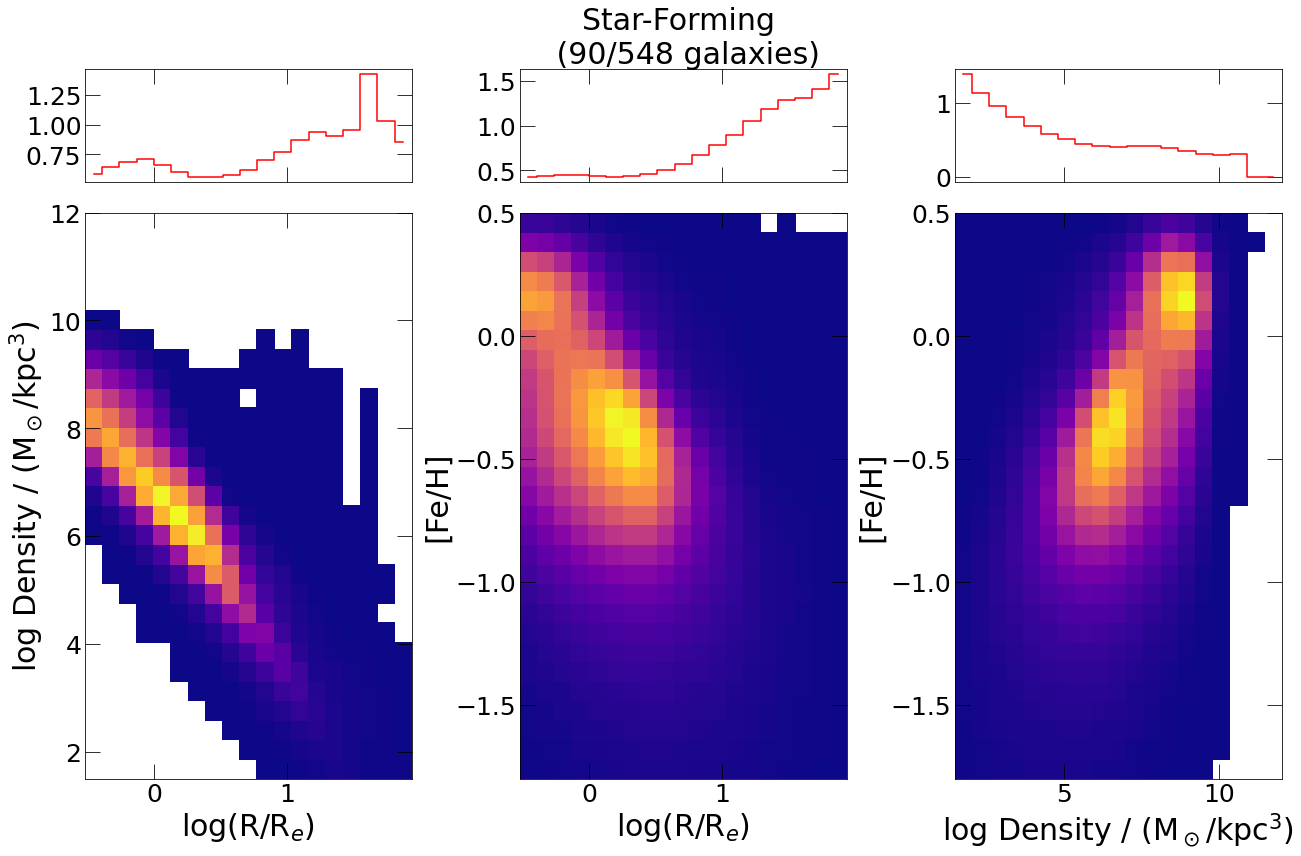

In [7]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie

#metallicity profiles
f, (axes) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(18, 12), gridspec_kw={'height_ratios': [1, 5]}, constrained_layout=True)
ax1 = axes[1][0]
ax2 = axes[1][1]
ax3 = axes[1][2]
sc1 = axes[0][0]
sc2 = axes[0][1]
sc3 = axes[0][2]

f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
big_density = np.zeros(0)
big_R = np.zeros(0)
big_FeH = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    R_e = halfmass_rad_stars(id, redshift)
    big_density = np.concatenate((big_density, np.log10(density)), axis=None)
    big_R = np.concatenate((big_R, np.log10(R/R_e)), axis=None)
    big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    h, _, _ = np.histogram2d(np.log10(R/R_e), np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(np.log10(R/R_e), logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 

# quantify scatter
xbins_new = (xbins[1:]+xbins[:-1])/2
densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
ybins_new = (ybins[1:]+ybins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

stat1, _, _ = stats.binned_statistic(big_R, big_density, 'std', bins=xbins)
stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'std', bins=xbins)
stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'std', bins=densitybins2)

sc1.step(xbins_new, stat1, 'r', where='mid')
sc2.step(xbins_new, stat2, 'r', where='mid')
sc3.step(densitybins2_new, stat3, 'r', where='mid')

# plot big pixel maps
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[0].set_xlim(-0.52, 1.94)
    ax[0].tick_params(which='major', length=15)
    ax[0].tick_params(which='minor', length=8)
    ax[0].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(1.5, 12)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax[1].set_xlim(-0.52, 1.94)
    ax[1].tick_params(which='major', length=15)
    ax[1].tick_params(which='minor', length=8)
    ax[1].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_ylim(-1.8, 0.5)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[2].set_xlim(1.5, 12)
    ax[2].tick_params(which='major', length=15)
    ax[2].tick_params(which='minor', length=8)
    ax[2].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_ylim(-1.8, 0.5)
# ax3.set_xscale('log')
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

sc2.set_title('Star-Forming \n (90/'+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts)

for ax in axes[0]:
    ax.set_xticklabels([])

f.tight_layout()

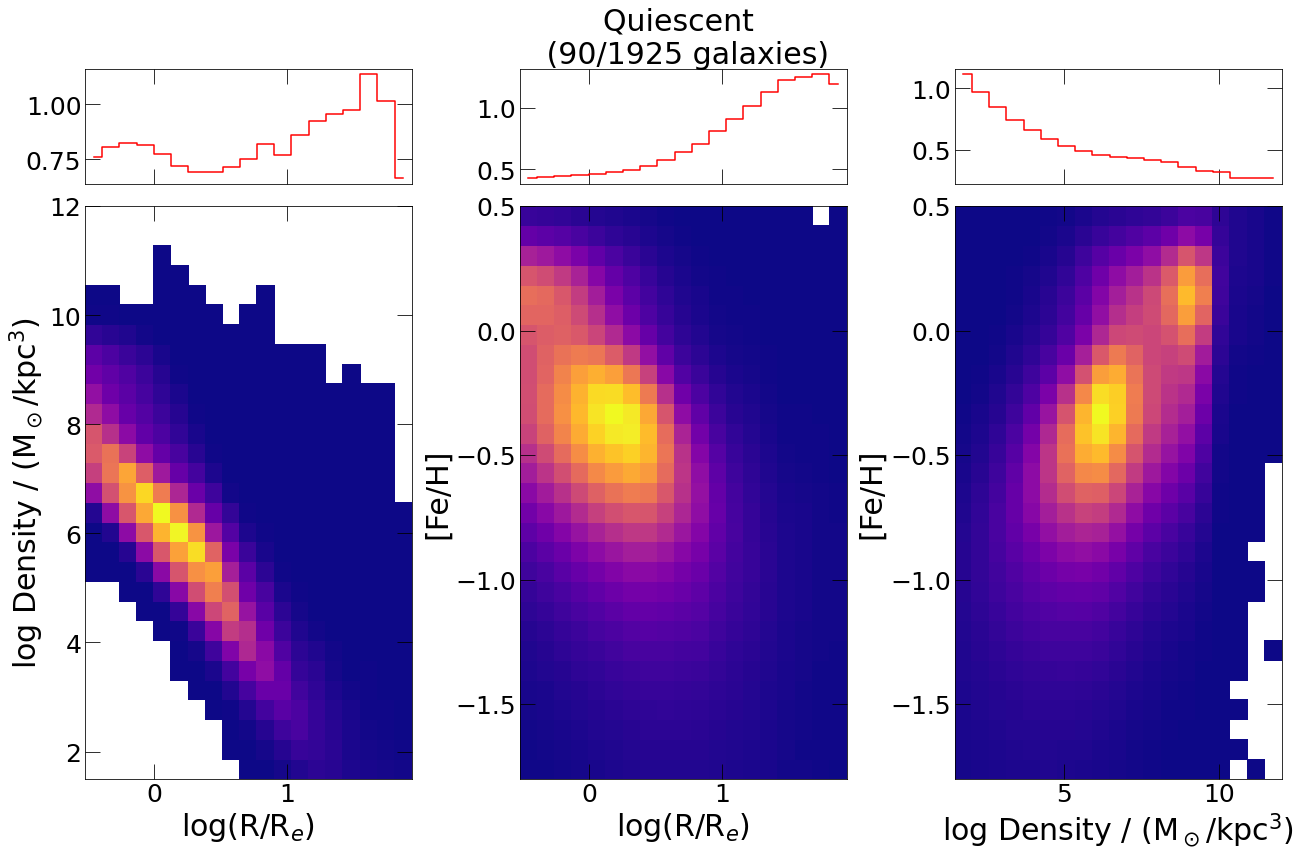

In [8]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie

#metallicity profiles
f, (axes) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(18, 12), gridspec_kw={'height_ratios': [1, 5]}, constrained_layout=True)
ax1 = axes[1][0]
ax2 = axes[1][1]
ax3 = axes[1][2]
sc1 = axes[0][0]
sc2 = axes[0][1]
sc3 = axes[0][2]

f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
big_density = np.zeros(0)
big_R = np.zeros(0)
big_FeH = np.zeros(0)
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    R_e = halfmass_rad_stars(id, redshift)
    big_density = np.concatenate((big_density, np.log10(density)), axis=None)
    big_R = np.concatenate((big_R, np.log10(R/R_e)), axis=None)
    big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    h, _, _ = np.histogram2d(np.log10(R/R_e), np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(np.log10(R/R_e), logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 

# quantify scatter
xbins_new = (xbins[1:]+xbins[:-1])/2
densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
ybins_new = (ybins[1:]+ybins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

stat1, _, _ = stats.binned_statistic(big_R, big_density, 'std', bins=xbins)
stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'std', bins=xbins)
stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'std', bins=densitybins2)

sc1.step(xbins_new, stat1, 'r', where='mid')
sc2.step(xbins_new, stat2, 'r', where='mid')
sc3.step(densitybins2_new, stat3, 'r', where='mid')

# plot big pixel maps
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[0].set_xlim(-0.52, 1.94)
    ax[0].tick_params(which='major', length=15)
    ax[0].tick_params(which='minor', length=8)
    ax[0].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(1.5, 12)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax[1].set_xlim(-0.52, 1.94)
    ax[1].tick_params(which='major', length=15)
    ax[1].tick_params(which='minor', length=8)
    ax[1].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_ylim(-1.8, 0.5)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[2].set_xlim(1.5, 12)
    ax[2].tick_params(which='major', length=15)
    ax[2].tick_params(which='minor', length=8)
    ax[2].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_ylim(-1.8, 0.5)
# ax3.set_xscale('log')
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

sc2.set_title('Quiescent \n (90/'+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts)

for ax in axes[0]:
    ax.set_xticklabels([])

f.tight_layout()

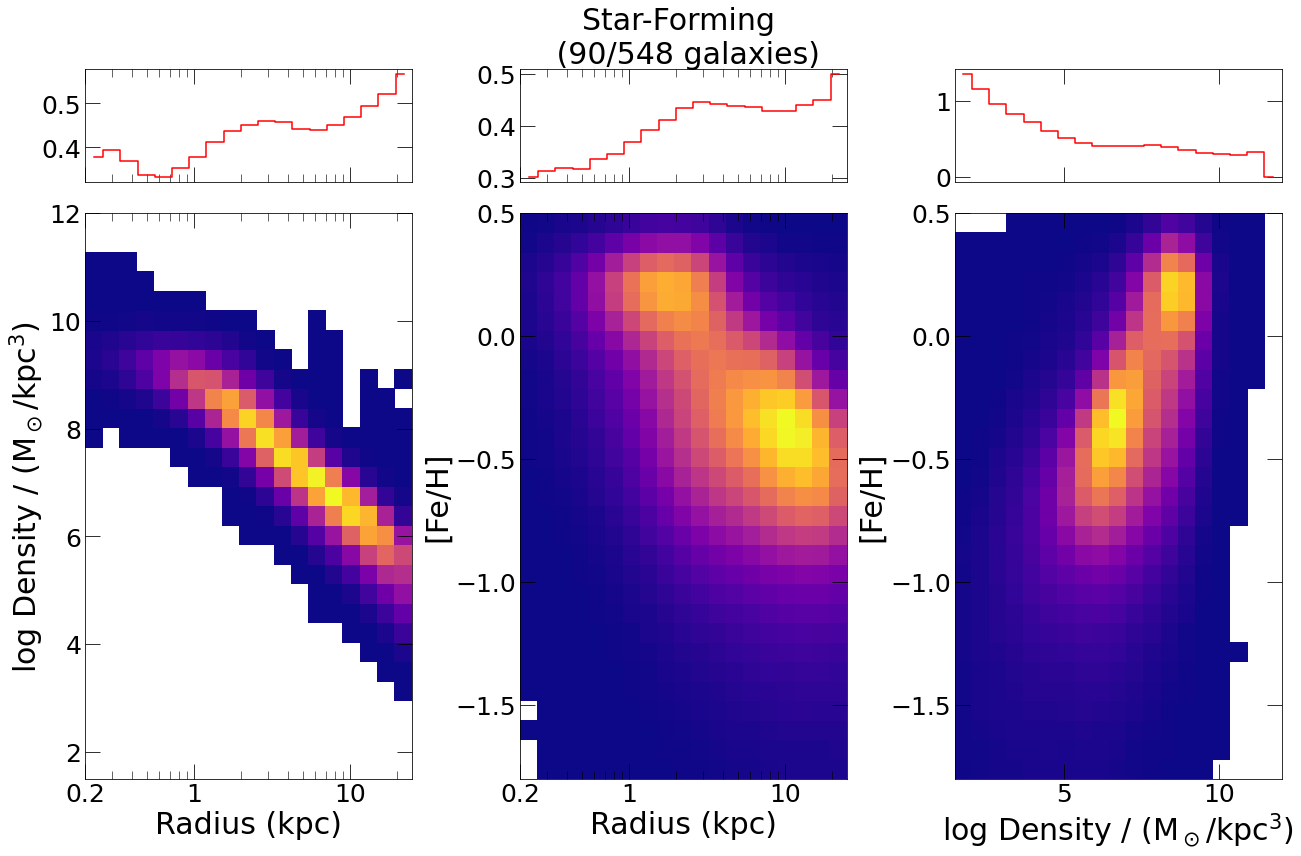

In [4]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie

#metallicity profiles
f, (axes) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(18, 12), gridspec_kw={'height_ratios': [1, 5]}, constrained_layout=True)
ax1 = axes[1][0]
ax2 = axes[1][1]
ax3 = axes[1][2]
sc1 = axes[0][0]
sc2 = axes[0][1]
sc3 = axes[0][2]

f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(-0.52, 1.94, 20)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
big_density = np.zeros(0)
big_R = np.zeros(0)
big_FeH = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    big_density = np.concatenate((big_density, np.log10(density)), axis=None)
    big_R = np.concatenate((big_R, R), axis=None)
    big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 

# quantify scatter
xbins_new = (xbins[1:]+xbins[:-1])/2
densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
ybins_new = (ybins[1:]+ybins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

stat1, _, _ = stats.binned_statistic(big_R, big_density, 'std', bins=xbins)
stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'std', bins=xbins)
stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'std', bins=densitybins2)

sc1.step(xbins_new, stat1, 'r', where='mid')
sc2.step(xbins_new, stat2, 'r', where='mid')
sc3.step(densitybins2_new, stat3, 'r', where='mid')

# plot big pixel maps
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[0].set_xlim(0.2, 25)
    ax[0].set_xscale('log')
    ax[0].set_xticks([0.2, 1, 10], minor=False)
    ax[0].set_xticklabels(['0.2', '1', '10'])
    ax[0].tick_params(which='major', length=15)
    ax[0].tick_params(which='minor', length=8)
    ax[0].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(1.5, 12)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax[1].set_xlim(0.2, 25)
    ax[1].set_xscale('log')
    ax[1].set_xticks([0.2, 1, 10], minor=False)
    ax[1].set_xticklabels(['0.2', '1', '10'])
    ax[1].tick_params(which='major', length=15)
    ax[1].tick_params(which='minor', length=8)
    ax[1].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_ylim(-1.8, 0.5)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[2].set_xlim(1.5, 12)
    ax[2].tick_params(which='major', length=15)
    ax[2].tick_params(which='minor', length=8)
    ax[2].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_ylim(-1.8, 0.5)
# ax3.set_xscale('log')
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

sc2.set_title('Star-Forming \n (90/'+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts)

for ax in axes[0]:
    ax.set_xticklabels([])

f.tight_layout()

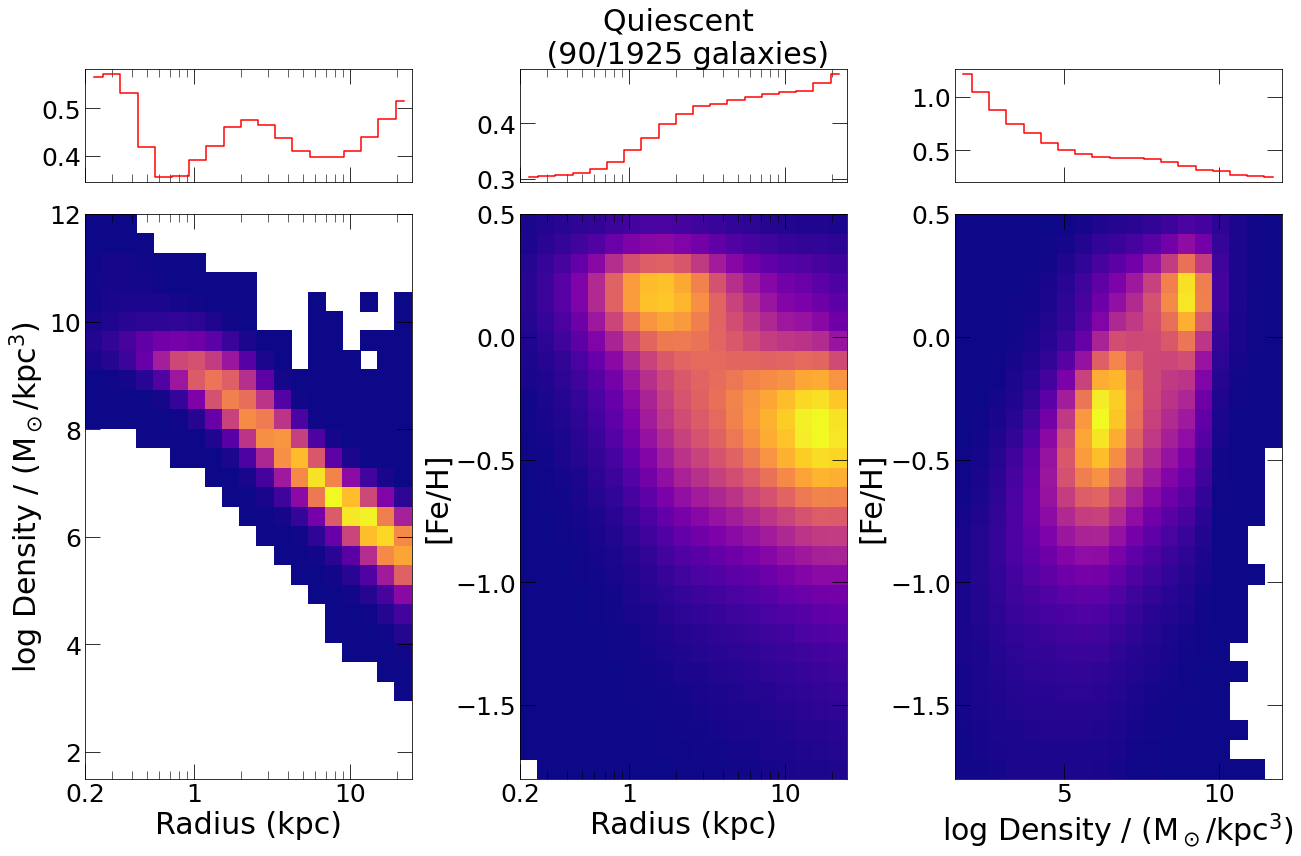

In [5]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie

#metallicity profiles
f, (axes) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(18, 12), gridspec_kw={'height_ratios': [1, 5]}, constrained_layout=True)
ax1 = axes[1][0]
ax2 = axes[1][1]
ax3 = axes[1][2]
sc1 = axes[0][0]
sc2 = axes[0][1]
sc3 = axes[0][2]

f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(-0.52, 1.94, 20)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
big_density = np.zeros(0)
big_R = np.zeros(0)
big_FeH = np.zeros(0)
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen')
    big_density = np.concatenate((big_density, np.log10(density)), axis=None)
    big_R = np.concatenate((big_R, R), axis=None)
    big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 

# quantify scatter
xbins_new = (xbins[1:]+xbins[:-1])/2
densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
ybins_new = (ybins[1:]+ybins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

stat1, _, _ = stats.binned_statistic(big_R, big_density, 'std', bins=xbins)
stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'std', bins=xbins)
stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'std', bins=densitybins2)

sc1.step(xbins_new, stat1, 'r', where='mid')
sc2.step(xbins_new, stat2, 'r', where='mid')
sc3.step(densitybins2_new, stat3, 'r', where='mid')

# plot big pixel maps
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[0].set_xlim(0.2, 25)
    ax[0].set_xscale('log')
    ax[0].set_xticks([0.2, 1, 10], minor=False)
    ax[0].set_xticklabels(['0.2', '1', '10'])
    ax[0].tick_params(which='major', length=15)
    ax[0].tick_params(which='minor', length=8)
    ax[0].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(1.5, 12)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax[1].set_xlim(0.2, 25)
    ax[1].set_xscale('log')
    ax[1].set_xticks([0.2, 1, 10], minor=False)
    ax[1].set_xticklabels(['0.2', '1', '10'])
    ax[1].tick_params(which='major', length=15)
    ax[1].tick_params(which='minor', length=8)
    ax[1].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_ylim(-1.8, 0.5)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[2].set_xlim(1.5, 12)
    ax[2].tick_params(which='major', length=15)
    ax[2].tick_params(which='minor', length=8)
    ax[2].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_ylim(-1.8, 0.5)
# ax3.set_xscale('log')
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

sc2.set_title('Quiescent \n (90/'+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts)

for ax in axes[0]:
    ax.set_xticklabels([])

f.tight_layout()

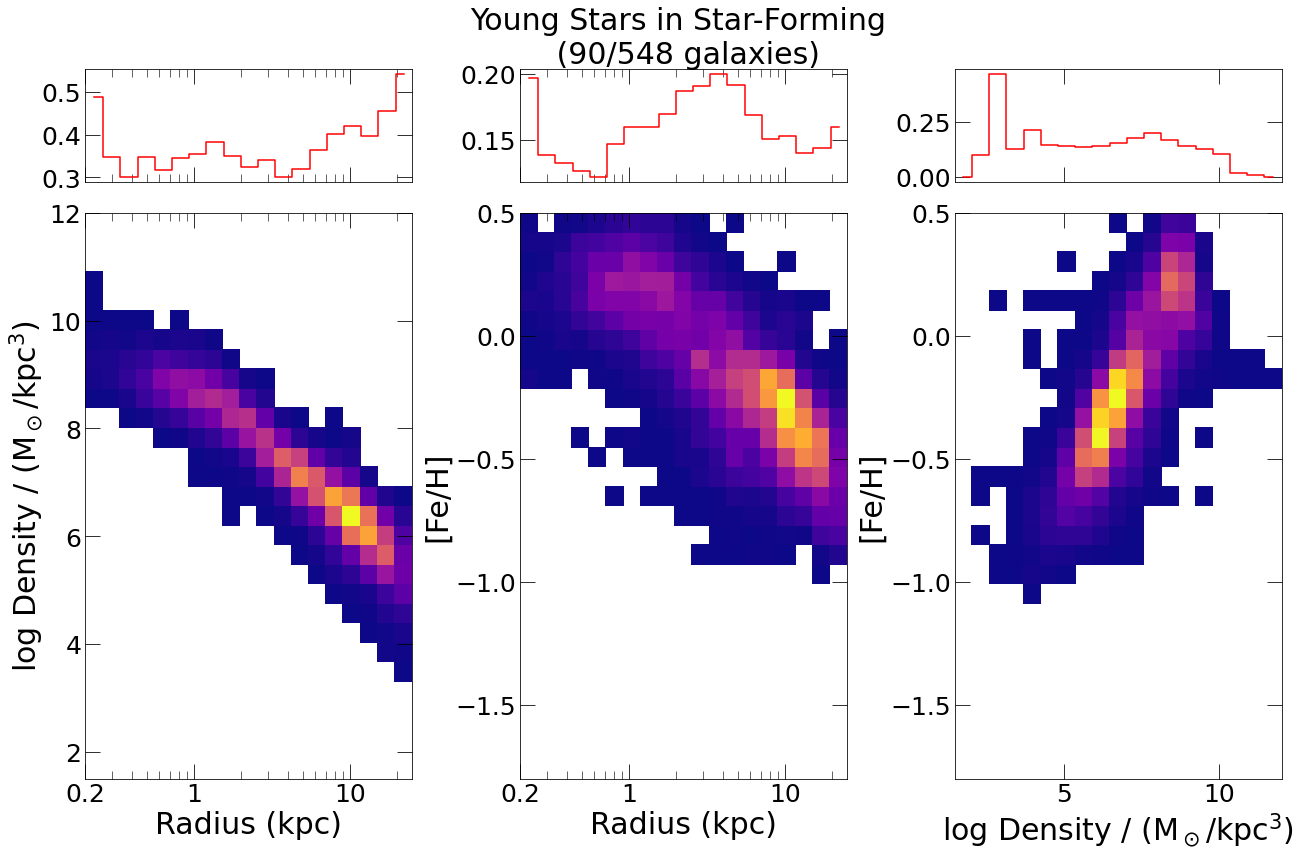

In [9]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(18, 12), gridspec_kw={'height_ratios': [1, 5]}, constrained_layout=True)
ax1 = axes[1][0]
ax2 = axes[1][1]
ax3 = axes[1][2]
sc1 = axes[0][0]
sc2 = axes[0][1]
sc3 = axes[0][2]

f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# quicker age calculation
starFormationTime = np.linspace(0, 1.0, 1000)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr

# xbins = np.linspace(-0.52, 1.94, 20)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
big_density = np.zeros(0)
big_R = np.zeros(0)
big_FeH = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
    big_density = np.concatenate((big_density, np.log10(density)), axis=None)
    big_R = np.concatenate((big_R, R), axis=None)
    big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 

# quantify scatter
xbins_new = (xbins[1:]+xbins[:-1])/2
densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
ybins_new = (ybins[1:]+ybins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

stat1, _, _ = stats.binned_statistic(big_R, big_density, 'std', bins=xbins)
stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'std', bins=xbins)
stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'std', bins=densitybins2)

sc1.step(xbins_new, stat1, 'r', where='mid')
sc2.step(xbins_new, stat2, 'r', where='mid')
sc3.step(densitybins2_new, stat3, 'r', where='mid')

# plot big pixel maps
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[0].set_xlim(0.2, 25)
    ax[0].set_xscale('log')
    ax[0].set_xticks([0.2, 1, 10], minor=False)
    ax[0].set_xticklabels(['0.2', '1', '10'])
    ax[0].tick_params(which='major', length=15)
    ax[0].tick_params(which='minor', length=8)
    ax[0].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(1.5, 12)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax[1].set_xlim(0.2, 25)
    ax[1].set_xscale('log')
    ax[1].set_xticks([0.2, 1, 10], minor=False)
    ax[1].set_xticklabels(['0.2', '1', '10'])
    ax[1].tick_params(which='major', length=15)
    ax[1].tick_params(which='minor', length=8)
    ax[1].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_ylim(-1.8, 0.5)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[2].set_xlim(1.5, 12)
    ax[2].tick_params(which='major', length=15)
    ax[2].tick_params(which='minor', length=8)
    ax[2].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_ylim(-1.8, 0.5)
# ax3.set_xscale('log')
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

sc2.set_title('Young Stars in Star-Forming \n (90/'+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts)

for ax in axes[0]:
    ax.set_xticklabels([])

f.tight_layout()

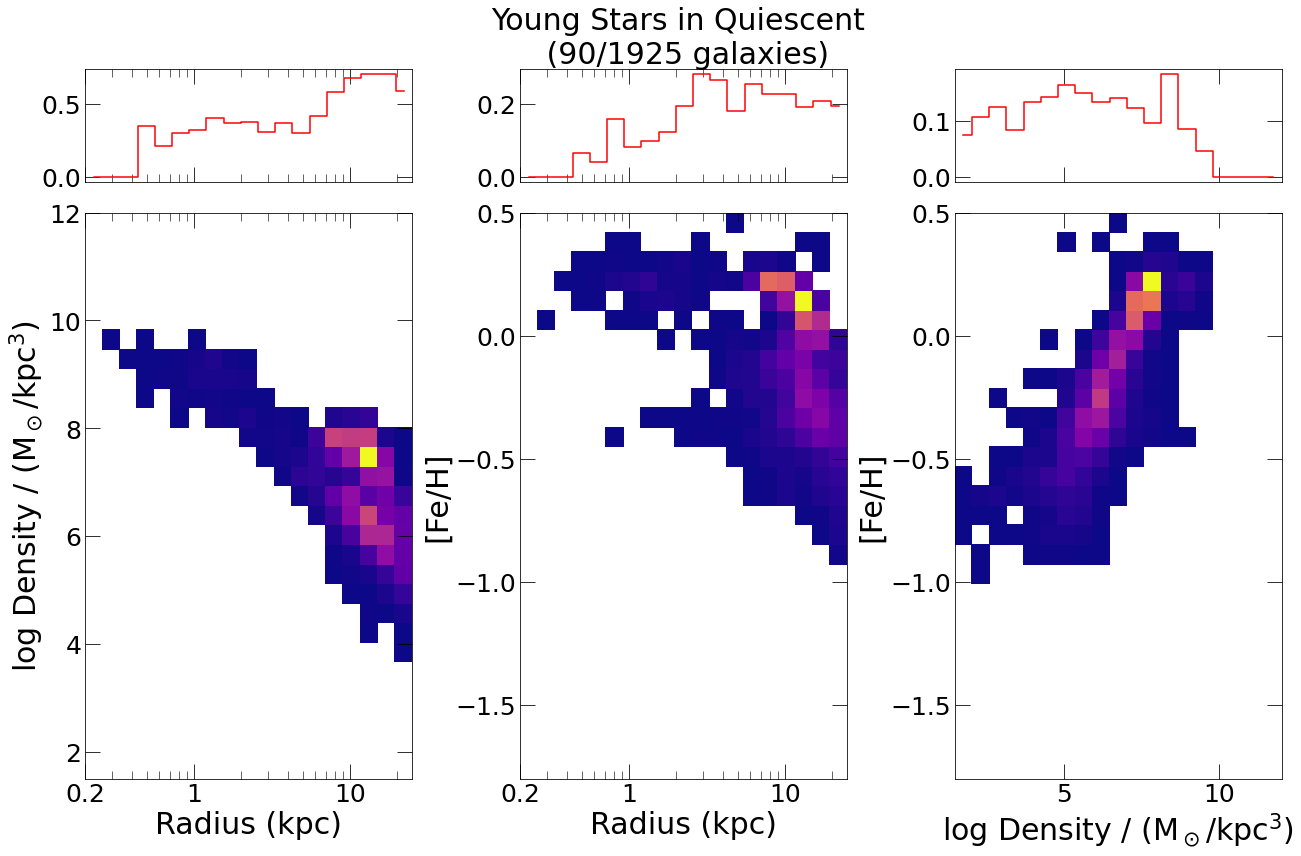

In [10]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(18, 12), gridspec_kw={'height_ratios': [1, 5]}, constrained_layout=True)
ax1 = axes[1][0]
ax2 = axes[1][1]
ax3 = axes[1][2]
sc1 = axes[0][0]
sc2 = axes[0][1]
sc3 = axes[0][2]

f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# quicker age calculation
starFormationTime = np.linspace(0, 1.0, 1000)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr

# xbins = np.linspace(-0.52, 1.94, 20)
xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
big_density = np.zeros(0)
big_R = np.zeros(0)
big_FeH = np.zeros(0)
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
    big_density = np.concatenate((big_density, np.log10(density)), axis=None)
    big_R = np.concatenate((big_R, R), axis=None)
    big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    h, _, _ = np.histogram2d(R, np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 

# quantify scatter
xbins_new = (xbins[1:]+xbins[:-1])/2
densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
ybins_new = (ybins[1:]+ybins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

stat1, _, _ = stats.binned_statistic(big_R, big_density, 'std', bins=xbins)
stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'std', bins=xbins)
stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'std', bins=densitybins2)

sc1.step(xbins_new, stat1, 'r', where='mid')
sc2.step(xbins_new, stat2, 'r', where='mid')
sc3.step(densitybins2_new, stat3, 'r', where='mid')

# plot big pixel maps
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[0].set_xlim(0.2, 25)
    ax[0].set_xscale('log')
    ax[0].set_xticks([0.2, 1, 10], minor=False)
    ax[0].set_xticklabels(['0.2', '1', '10'])
    ax[0].tick_params(which='major', length=15)
    ax[0].tick_params(which='minor', length=8)
    ax[0].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(1.5, 12)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('Radius (kpc)', fontsize=fts)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax[1].set_xlim(0.2, 25)
    ax[1].set_xscale('log')
    ax[1].set_xticks([0.2, 1, 10], minor=False)
    ax[1].set_xticklabels(['0.2', '1', '10'])
    ax[1].tick_params(which='major', length=15)
    ax[1].tick_params(which='minor', length=8)
    ax[1].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_ylim(-1.8, 0.5)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('Radius (kpc)', fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[2].set_xlim(1.5, 12)
    ax[2].tick_params(which='major', length=15)
    ax[2].tick_params(which='minor', length=8)
    ax[2].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_ylim(-1.8, 0.5)
# ax3.set_xscale('log')
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

sc2.set_title('Young Stars in Quiescent \n (90/'+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts)

for ax in axes[0]:
    ax.set_xticklabels([])

f.tight_layout()

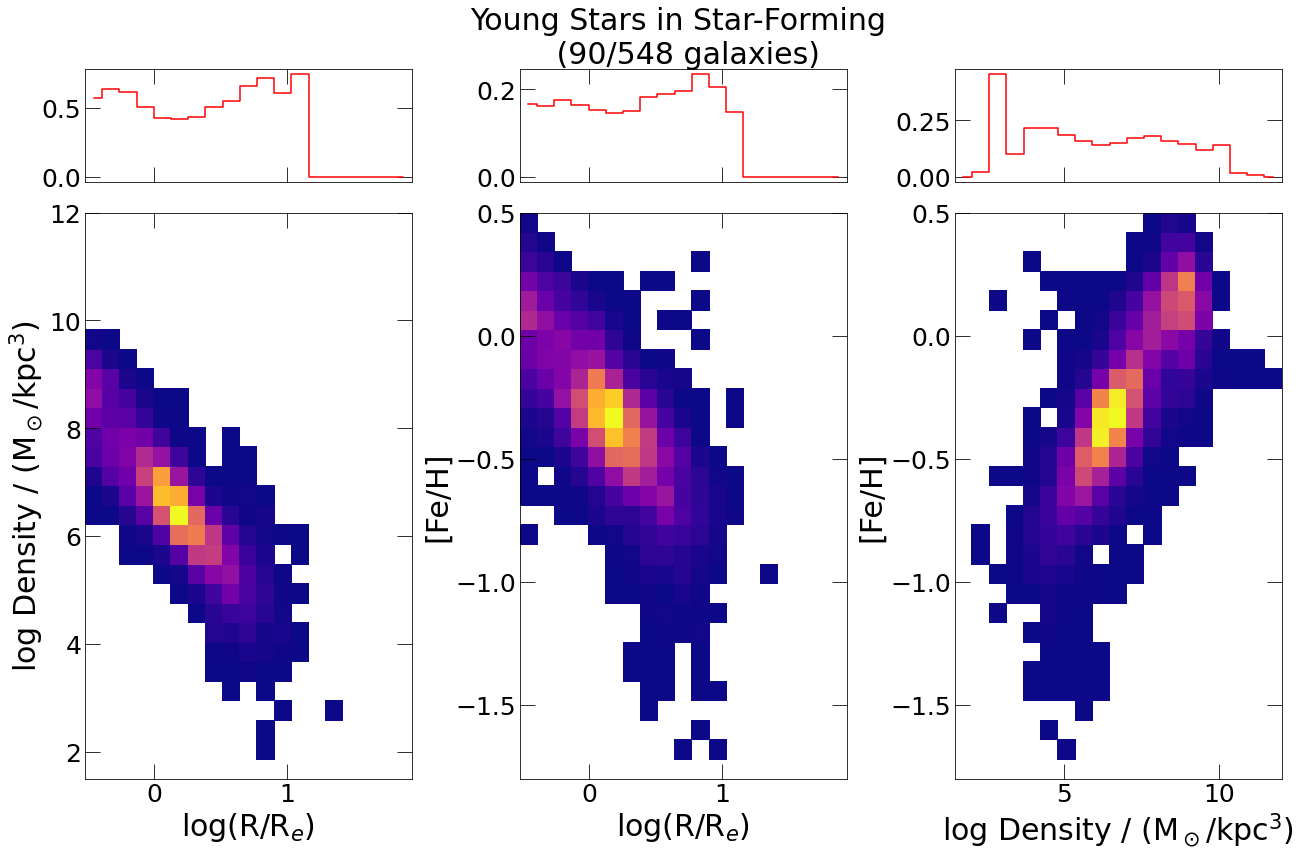

In [11]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(18, 12), gridspec_kw={'height_ratios': [1, 5]}, constrained_layout=True)
ax1 = axes[1][0]
ax2 = axes[1][1]
ax3 = axes[1][2]
sc1 = axes[0][0]
sc2 = axes[0][1]
sc3 = axes[0][2]

f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# quicker age calculation
starFormationTime = np.linspace(0, 1.0, 1000)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr

# xbins = np.linspace(-0.52, 1.94, 20)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
big_density = np.zeros(0)
big_R = np.zeros(0)
big_FeH = np.zeros(0)
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
    R_e = halfmass_rad_stars(id, redshift)
    big_density = np.concatenate((big_density, np.log10(density)), axis=None)
    big_R = np.concatenate((big_R, np.log10(R/R_e)), axis=None)
    big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    h, _, _ = np.histogram2d(np.log10(R/R_e), np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(np.log10(R/R_e), logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 

# quantify scatter
xbins_new = (xbins[1:]+xbins[:-1])/2
densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
ybins_new = (ybins[1:]+ybins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

stat1, _, _ = stats.binned_statistic(big_R, big_density, 'std', bins=xbins)
stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'std', bins=xbins)
stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'std', bins=densitybins2)

sc1.step(xbins_new, stat1, 'r', where='mid')
sc2.step(xbins_new, stat2, 'r', where='mid')
sc3.step(densitybins2_new, stat3, 'r', where='mid')

# plot big pixel maps
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[0].set_xlim(-0.52, 1.94)
#     ax[0].set_xscale('log')
#     ax[0].set_xticks([0.2, 1, 10], minor=False)
#     ax[0].set_xticklabels(['0.2', '1', '10'])
    ax[0].tick_params(which='major', length=15)
    ax[0].tick_params(which='minor', length=8)
    ax[0].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(1.5, 12)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax[1].set_xlim(-0.52, 1.94)
#     ax[1].set_xscale('log')
#     ax[1].set_xticks([0.2, 1, 10], minor=False)
#     ax[1].set_xticklabels(['0.2', '1', '10'])
    ax[1].tick_params(which='major', length=15)
    ax[1].tick_params(which='minor', length=8)
    ax[1].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_ylim(-1.8, 0.5)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[2].set_xlim(1.5, 12)
    ax[2].tick_params(which='major', length=15)
    ax[2].tick_params(which='minor', length=8)
    ax[2].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_ylim(-1.8, 0.5)
# ax3.set_xscale('log')
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

sc2.set_title('Young Stars in Star-Forming \n (90/'+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts)

for ax in axes[0]:
    ax.set_xticklabels([])

f.tight_layout()

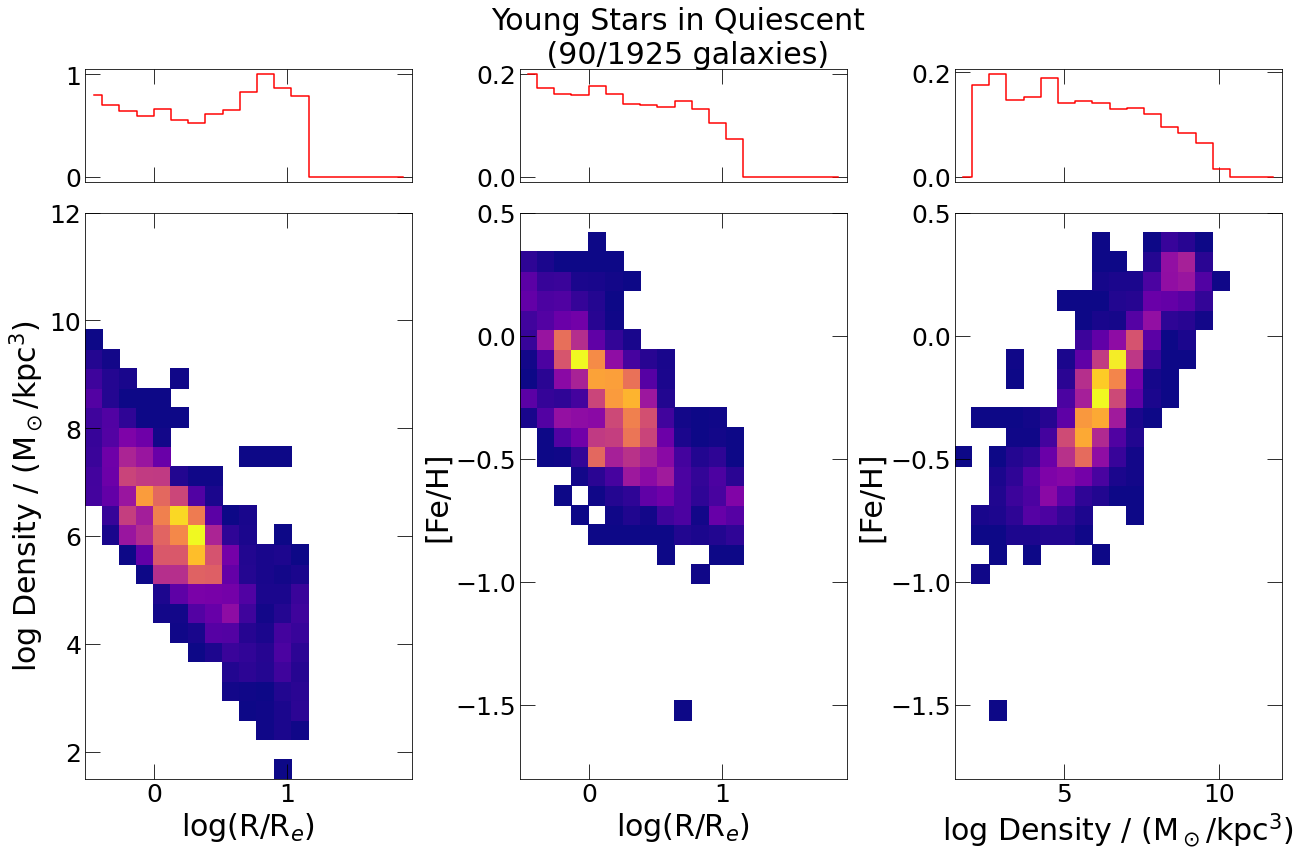

In [12]:
from matplotlib import colors
from scipy import stats
from scipy.stats import norm as normie
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.constants import G, h, k_B
h = 0.6774
cosmo = FlatLambdaCDM(H0= (h * 100) * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

#metallicity profiles
f, (axes) = plt.subplots(2, 3, sharex='none', sharey='none', figsize=(18, 12), gridspec_kw={'height_ratios': [1, 5]}, constrained_layout=True)
ax1 = axes[1][0]
ax2 = axes[1][1]
ax3 = axes[1][2]
sc1 = axes[0][0]
sc2 = axes[0][1]
sc3 = axes[0][2]

f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# quicker age calculation
starFormationTime = np.linspace(0, 1.0, 1000)
starFormationRedshift = 1/starFormationTime - 1 #units:redshift
starFormationGyr = cosmo.age(starFormationRedshift).value #units:Gyr

# xbins = np.linspace(-0.52, 1.94, 20)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
xbins = np.linspace(-0.52, 1.94, 20)
ybins = np.linspace(1.5, 12, 30)
metalbins = np.linspace(-1.8, 0.5, 30)
densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(xbins)-1, len(ybins)-1))
big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
big_density = np.zeros(0)
big_R = np.zeros(0)
big_FeH = np.zeros(0)
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, density, R = histmetals_density_profile(id=id, redshift=redshift, n_bins=n_bins, num='iron', den='hydrogen', young=[starFormationTime, starFormationGyr])
    R_e = halfmass_rad_stars(id, redshift)
    big_density = np.concatenate((big_density, np.log10(density)), axis=None)
    big_R = np.concatenate((big_R, np.log10(R/R_e)), axis=None)
    big_FeH = np.concatenate((big_FeH, logFeH), axis=None)
    h, _, _ = np.histogram2d(np.log10(R/R_e), np.log10(density), bins=[xbins, ybins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(np.log10(R/R_e), logFeH, bins=[xbins, metalbins], density=False)
    h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 

# quantify scatter
xbins_new = (xbins[1:]+xbins[:-1])/2
densitybins2_new = (densitybins2[1:]+densitybins2[:-1])/2
ybins_new = (ybins[1:]+ybins[:-1])/2
metalbins_new = (metalbins[1:]+metalbins[:-1])/2

stat1, _, _ = stats.binned_statistic(big_R, big_density, 'std', bins=xbins)
stat2, _, _ = stats.binned_statistic(big_R, big_FeH, 'std', bins=xbins)
stat3, _, _ = stats.binned_statistic(big_density, big_FeH, 'std', bins=densitybins2)

sc1.step(xbins_new, stat1, 'r', where='mid')
sc2.step(xbins_new, stat2, 'r', where='mid')
sc3.step(densitybins2_new, stat3, 'r', where='mid')

# plot big pixel maps
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(xbins, ybins, big_h.T, cmap='plasma', color=color, edgecolor=None)
# ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[0].set_xlim(-0.52, 1.94)
#     ax[0].set_xscale('log')
#     ax[0].set_xticks([0.2, 1, 10], minor=False)
#     ax[0].set_xticklabels(['0.2', '1', '10'])
    ax[0].tick_params(which='major', length=15)
    ax[0].tick_params(which='minor', length=8)
    ax[0].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax1.set_ylim(1.5, 12)
ax1.set_ylabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax1.set_xlabel('log(R/R$_e$)', fontsize=fts)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(xbins, metalbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
for ax in axes:
    ax[1].set_xlim(-0.52, 1.94)
#     ax[1].set_xscale('log')
#     ax[1].set_xticks([0.2, 1, 10], minor=False)
#     ax[1].set_xticklabels(['0.2', '1', '10'])
    ax[1].tick_params(which='major', length=15)
    ax[1].tick_params(which='minor', length=8)
    ax[1].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax2.set_ylim(-1.8, 0.5)
ax2.set_ylabel("[Fe/H]", fontsize=fts)
ax2.set_xlabel('log(R/R$_e$)', fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(densitybins2, metalbins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
# ax3.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
for ax in axes:
    ax[2].set_xlim(1.5, 12)
    ax[2].tick_params(which='major', length=15)
    ax[2].tick_params(which='minor', length=8)
    ax[2].tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)
ax3.set_xlabel("log Density / (M$_\odot$/kpc$^3$)", fontsize=fts)
ax3.set_ylabel('[Fe/H]', fontsize=fts)
ax3.set_ylim(-1.8, 0.5)
# ax3.set_xscale('log')
# ax3.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

sc2.set_title('Young Stars in Quiescent \n (90/'+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts)

for ax in axes[0]:
    ax.set_xticklabels([])

f.tight_layout()

# Age

## [Fe/H]

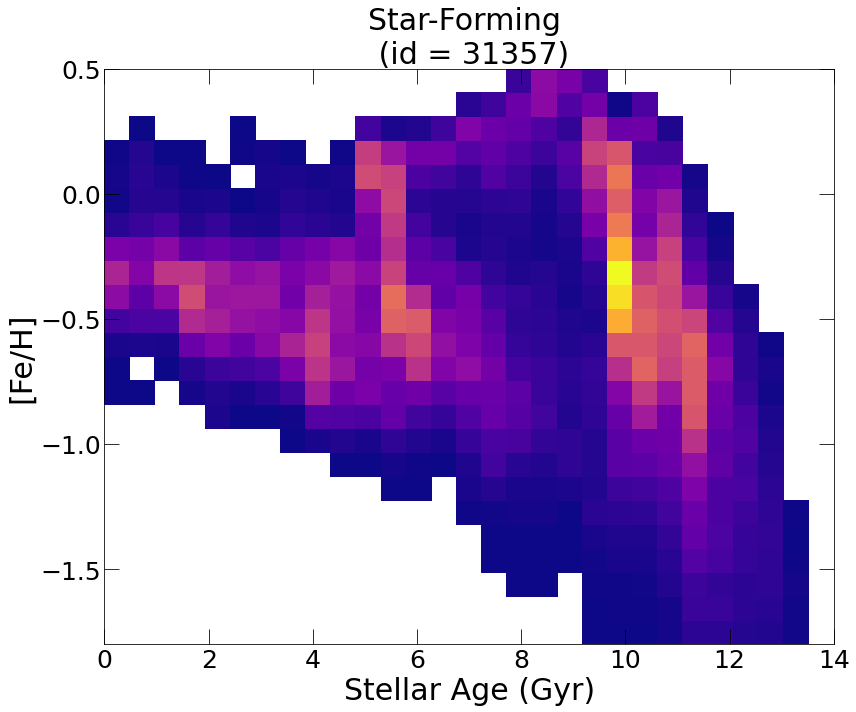

In [12]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(12, 10), constrained_layout=True)
ax1 = axes
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.8, 0.5, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
# big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
# big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 1, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
#     h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
#     h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
#     big_h3 += h3
#     big_h2 += h2
    big_h += h 
    number = id
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Star-Forming \n (id = '+str(number)+')', fontsize=fts) #
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlim(0.0, 14)
ax1.set_ylabel("[Fe/H]", fontsize=fts)
ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

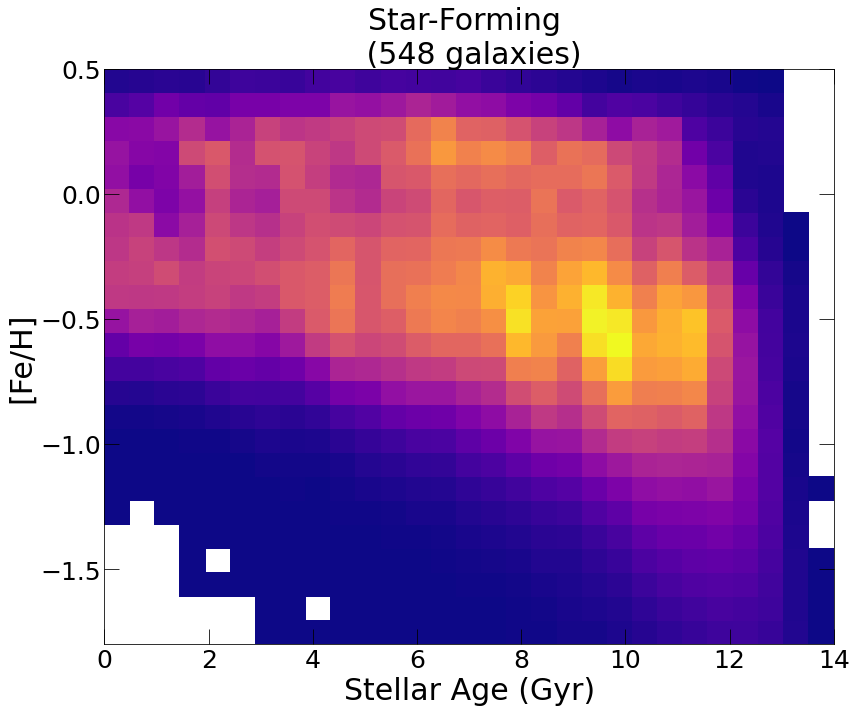

In [13]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(12, 10), constrained_layout=True)
ax1 = axes
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.8, 0.5, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
# big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
# big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
#     h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
#     h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
#     big_h3 += h3
#     big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlim(0.0, 14)
ax1.set_ylabel("[Fe/H]", fontsize=fts)
ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

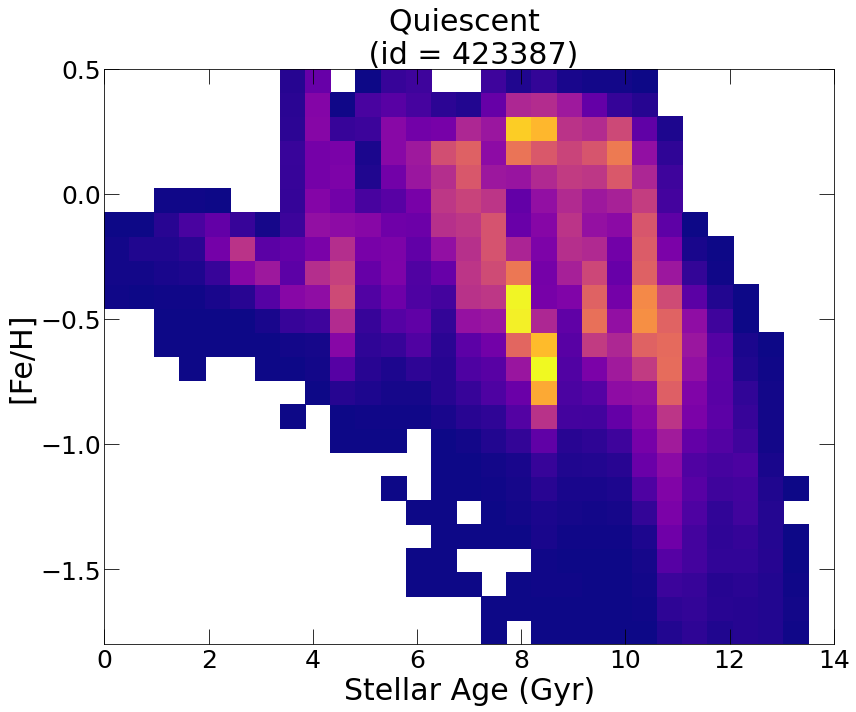

In [14]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(12, 10), constrained_layout=True)
ax1 = axes
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.8, 0.5, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
# big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
# big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 1, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
#     h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
#     h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
#     big_h3 += h3
#     big_h2 += h2
    big_h += h 
    number = id
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Quiescent \n (id = '+str(number)+')', fontsize=fts) #
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlim(0.0, 14)
ax1.set_ylabel("[Fe/H]", fontsize=fts)
ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

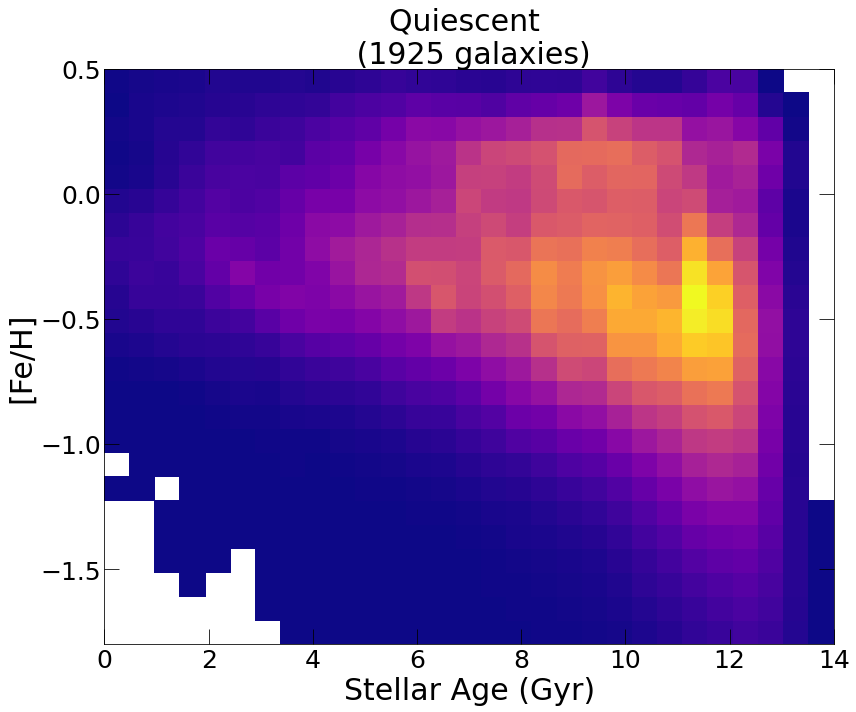

In [15]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(12, 10), constrained_layout=True)
ax1 = axes
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.8, 0.5, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
# big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
# big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
#     h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
#     h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
#     big_h3 += h3
#     big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Quiescent \n ('+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(-1.8, 0.5)
ax1.set_xlim(0.0, 14)
ax1.set_ylabel("[Fe/H]", fontsize=fts)
ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

## [Mg/H]

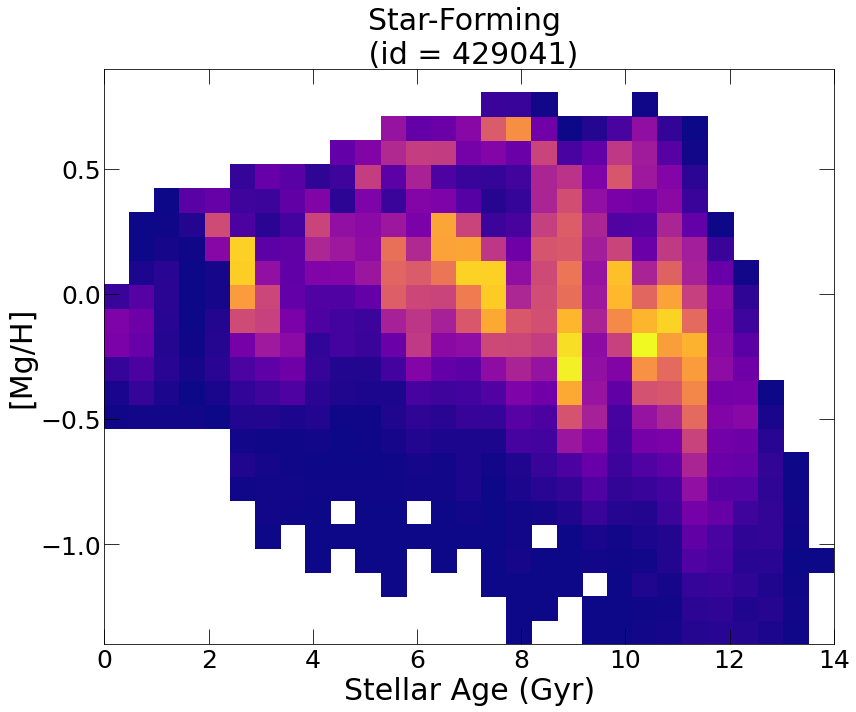

In [16]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(12, 10), constrained_layout=True)
ax1 = axes
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.4, 0.9, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
# big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
# big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 1, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
#     h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
#     h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
#     big_h3 += h3
#     big_h2 += h2
    big_h += h 
    number = id
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Star-Forming \n (id = '+str(number)+')', fontsize=fts) #
ax1.set_ylim(-1.4, 0.9)
ax1.set_xlim(0.0, 14)
ax1.set_ylabel("[Mg/H]", fontsize=fts)
ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

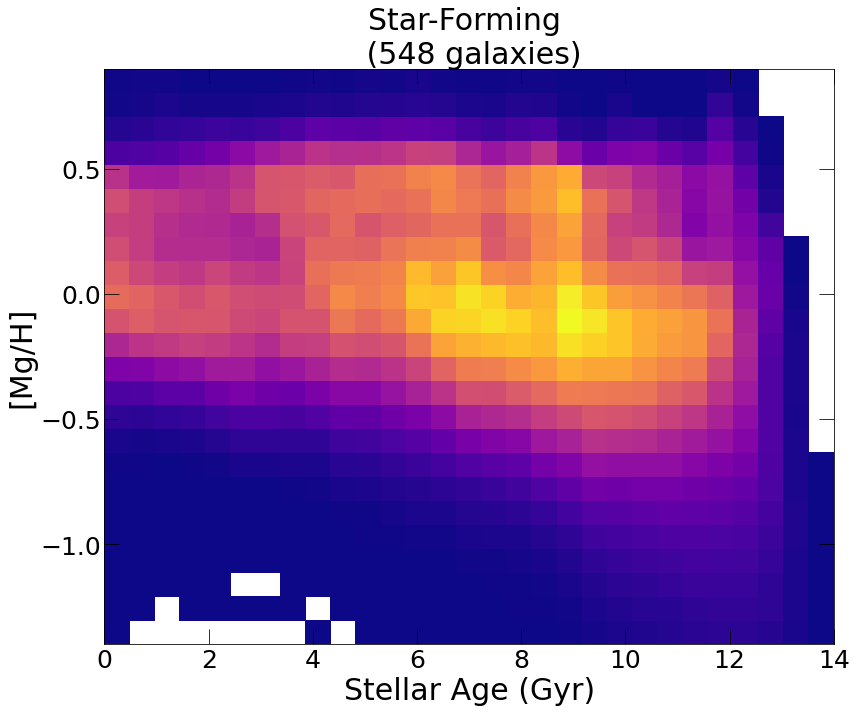

In [17]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(12, 10), constrained_layout=True)
ax1 = axes
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.4, 0.9, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
# big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
# big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
#     h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
#     h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
#     big_h3 += h3
#     big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Star-Forming \n ('+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(-1.4, 0.9)
ax1.set_xlim(0.0, 14)
ax1.set_ylabel("[Mg/H]", fontsize=fts)
ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

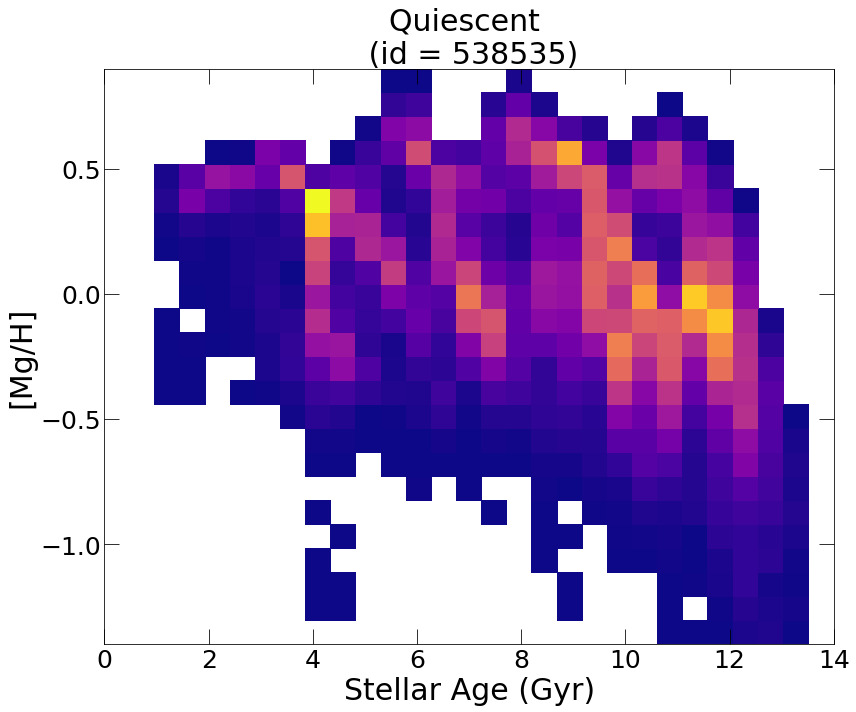

In [18]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(12, 10), constrained_layout=True)
ax1 = axes
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.4, 0.9, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
# big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
# big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 1, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
#     h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
#     h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
#     big_h3 += h3
#     big_h2 += h2
    big_h += h 
    number = id
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Quiescent \n (id = '+str(number)+')', fontsize=fts) #
ax1.set_ylim(-1.4, 0.9)
ax1.set_xlim(0.0, 14)
ax1.set_ylabel("[Mg/H]", fontsize=fts)
ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

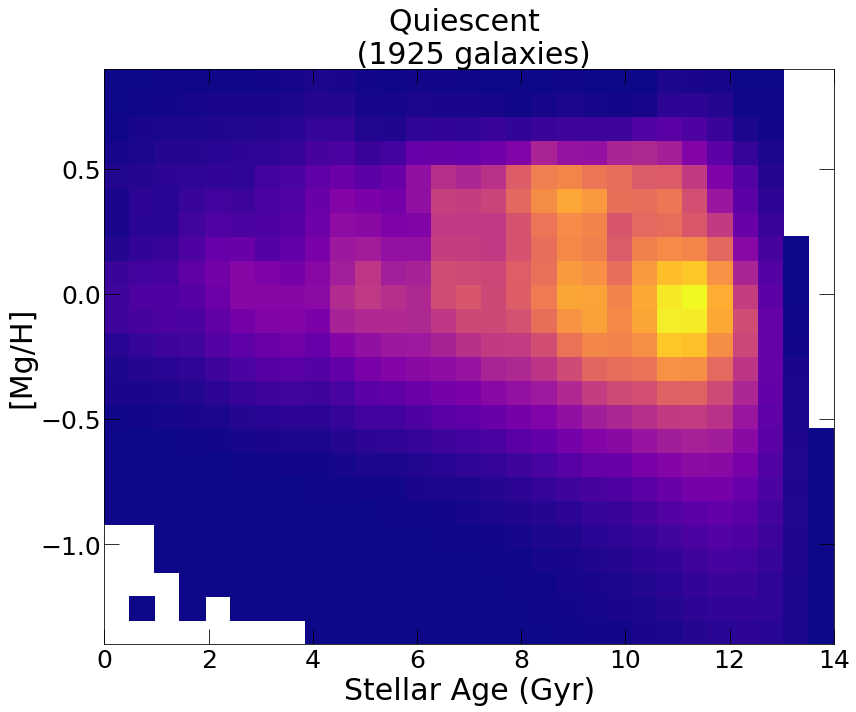

In [19]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(1, 1, sharex='none', sharey='none', figsize=(12, 10), constrained_layout=True)
ax1 = axes
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.4, 0.9, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
# big_h2 = np.zeros((len(xbins)-1, len(metalbins)-1))
# big_h3 = np.zeros((len(densitybins2)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
#     h2, _, _ = np.histogram2d(R, logFeH, bins=[xbins, metalbins], density=False)
#     h3, _, _ = np.histogram2d(np.log10(density), logFeH, bins=[densitybins2, metalbins], density=False)
#     big_h3 += h3
#     big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Quiescent \n ('+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(-1.4, 0.9)
ax1.set_xlim(0.0, 14)
ax1.set_ylabel("[Mg/H]", fontsize=fts)
ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
ax1.tick_params(which='major', length=15)
ax1.tick_params(which='minor', length=8)
ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

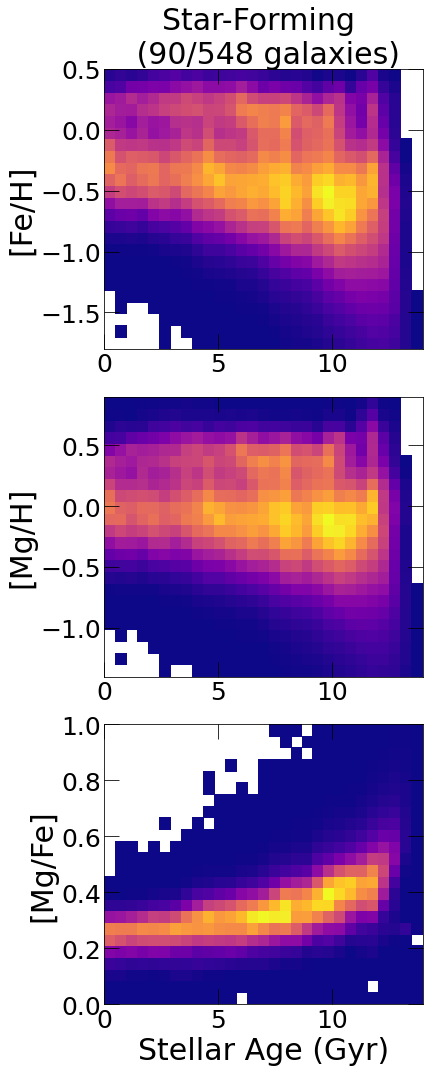

In [7]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(3, 1, sharex='none', sharey='none', figsize=(6, 15), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.8, 0.5, 25)
MgHbins = np.linspace(-1.4, 0.9, 25)
MgFebins = np.linspace(0, 1, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
big_h2 = np.zeros((len(agebins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(agebins)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 90, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', axis='age', only_particles=True)
    logMgH, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', axis='age', only_particles=True)
    logMgFe, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='iron', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(age, logMgH, bins=[agebins, MgHbins], density=False)
    h3, _, _ = np.histogram2d(age, logMgFe, bins=[agebins, MgFebins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Star-Forming \n (90/'+str(len(ids[starforming_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(-1.8, 0.5)
# ax1.set_xlim(0.0, 7)
ax1.set_ylabel("[Fe/H]", fontsize=fts)
# ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
# ax1.tick_params(which='major', length=15)
# ax1.tick_params(which='minor', length=8)
# ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(agebins, MgHbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_ylim(-1.4, 0.9)
ax2.set_ylabel("[Mg/H]", fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(agebins, MgFebins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
ax3.set_ylim(0, 1)
ax3.set_ylabel("[Mg/Fe]", fontsize=fts)
ax3.set_xlabel('Stellar Age (Gyr)', fontsize=fts)

for ax in axes:
    ax.set_xlim(0.0, 14)
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

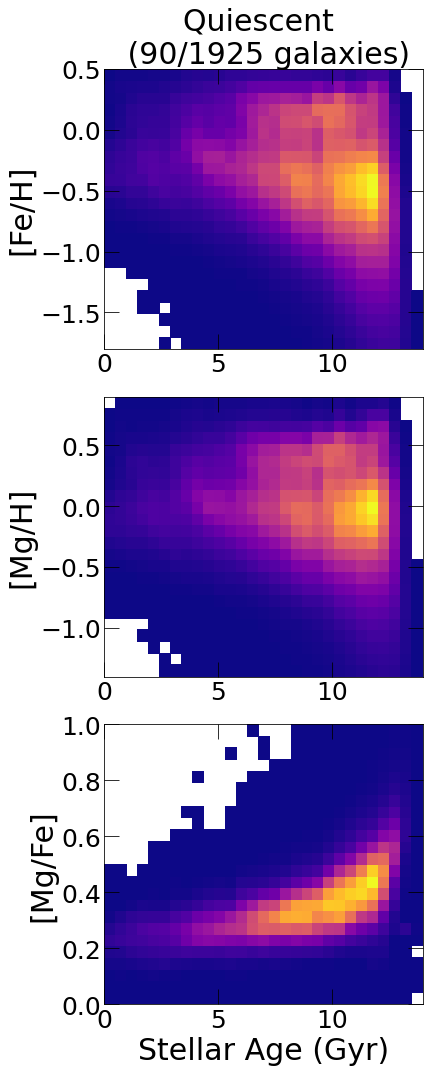

In [8]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(3, 1, sharex='none', sharey='none', figsize=(6, 15), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.8, 0.5, 25)
MgHbins = np.linspace(-1.4, 0.9, 25)
MgFebins = np.linspace(0, 1, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
big_h2 = np.zeros((len(agebins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(agebins)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 90, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', axis='age', only_particles=True)
    logMgH, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', axis='age', only_particles=True)
    logMgFe, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='iron', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(age, logMgH, bins=[agebins, MgHbins], density=False)
    h3, _, _ = np.histogram2d(age, logMgFe, bins=[agebins, MgFebins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Quiescent \n (90/'+str(len(ids[quiescent_selection]))+' galaxies)', fontsize=fts) #
ax1.set_ylim(-1.8, 0.5)
# ax1.set_xlim(0.0, 7)
ax1.set_ylabel("[Fe/H]", fontsize=fts)
# ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
# ax1.tick_params(which='major', length=15)
# ax1.tick_params(which='minor', length=8)
# ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(agebins, MgHbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_ylim(-1.4, 0.9)
ax2.set_ylabel("[Mg/H]", fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(agebins, MgFebins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
ax3.set_ylim(0, 1)
ax3.set_ylabel("[Mg/Fe]", fontsize=fts)
ax3.set_xlabel('Stellar Age (Gyr)', fontsize=fts)

for ax in axes:
    ax.set_xlim(0.0, 14)
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

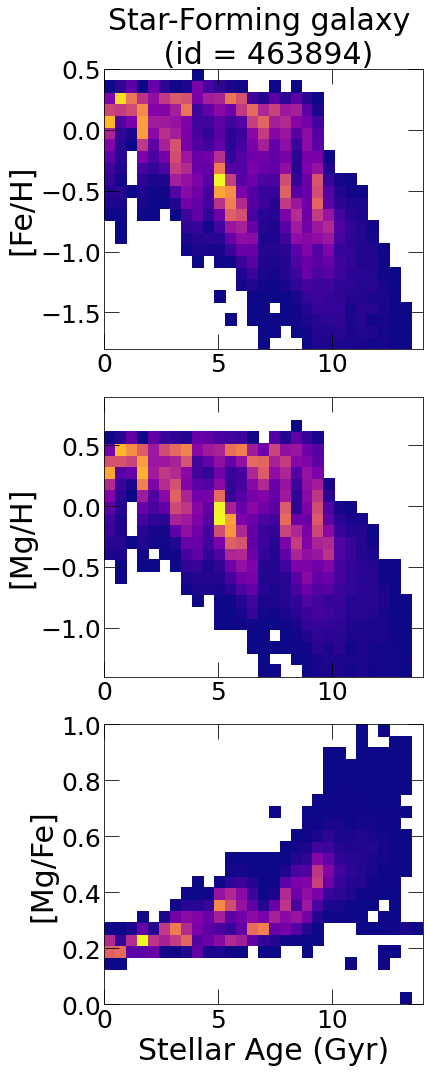

In [9]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(3, 1, sharex='none', sharey='none', figsize=(6, 15), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.8, 0.5, 25)
MgHbins = np.linspace(-1.4, 0.9, 25)
MgFebins = np.linspace(0, 1, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
big_h2 = np.zeros((len(agebins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(agebins)-1, len(metalbins)-1))
for id in np.random.choice(ids[starforming_selection], 1, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', axis='age', only_particles=True)
    logMgH, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', axis='age', only_particles=True)
    logMgFe, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='iron', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(age, logMgH, bins=[agebins, MgHbins], density=False)
    h3, _, _ = np.histogram2d(age, logMgFe, bins=[agebins, MgFebins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
    number = id
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Star-Forming galaxy \n (id = '+str(number)+')', fontsize=fts) #
ax1.set_ylim(-1.8, 0.5)
# ax1.set_xlim(0.0, 7)
ax1.set_ylabel("[Fe/H]", fontsize=fts)
# ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
# ax1.tick_params(which='major', length=15)
# ax1.tick_params(which='minor', length=8)
# ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(agebins, MgHbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_ylim(-1.4, 0.9)
ax2.set_ylabel("[Mg/H]", fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(agebins, MgFebins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
ax3.set_ylim(0, 1)
ax3.set_ylabel("[Mg/Fe]", fontsize=fts)
ax3.set_xlabel('Stellar Age (Gyr)', fontsize=fts)

for ax in axes:
    ax.set_xlim(0.0, 14)
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()

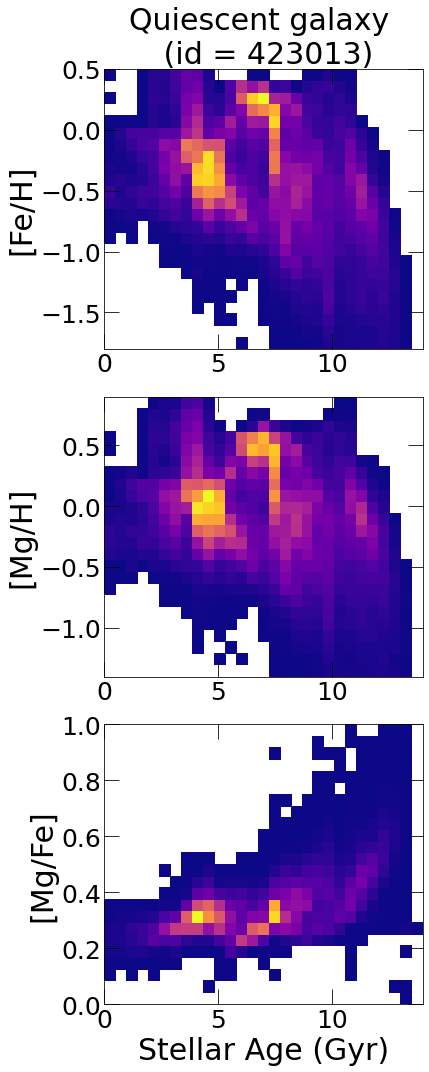

In [10]:
from matplotlib import colors

#metallicity profiles
f, (axes) = plt.subplots(3, 1, sharex='none', sharey='none', figsize=(6, 15), constrained_layout=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
f.set_facecolor('w')
n_bins = 50
fts = 30
ftss = 25
vmin = 1.0

colormap = plt.get_cmap('plasma')
norm = colors.Normalize(vmin=vmin, vmax=230)

# xbins = np.linspace(0.2, 25, 30)
# xbins = np.logspace(np.log10(0.2), np.log10(25), 20)
agebins = np.linspace(0, 14, 30)
metalbins = np.linspace(-1.8, 0.5, 25)
MgHbins = np.linspace(-1.4, 0.9, 25)
MgFebins = np.linspace(0, 1, 25)
# densitybins2 = np.linspace(1.5, 12, 20)

#z=2 star-forming galaxies
big_h = np.zeros((len(agebins)-1, len(metalbins)-1))
big_h2 = np.zeros((len(agebins)-1, len(metalbins)-1))
big_h3 = np.zeros((len(agebins)-1, len(metalbins)-1))
for id in np.random.choice(ids[quiescent_selection], 1, replace=False):
    logFeH, age = metals_profile(id=id, redshift=redshift, num='iron', den='hydrogen', axis='age', only_particles=True)
    logMgH, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='hydrogen', axis='age', only_particles=True)
    logMgFe, age = metals_profile(id=id, redshift=redshift, num='magnesium', den='iron', axis='age', only_particles=True)
    h, _, _ = np.histogram2d(age, logFeH, bins=[agebins, metalbins], density=False)#, len(percentiles))
    h2, _, _ = np.histogram2d(age, logMgH, bins=[agebins, MgHbins], density=False)
    h3, _, _ = np.histogram2d(age, logMgFe, bins=[agebins, MgFebins], density=False)
    big_h3 += h3
    big_h2 += h2
    big_h += h 
    number = id
big_h[big_h==0] = np.nan
color=colormap(norm(big_h)).tolist()
color = tuple(color[0][:])
ax1.pcolormesh(agebins, metalbins, big_h.T, cmap='plasma', color=color, edgecolor=None)
ax1.set_title('Quiescent galaxy \n (id = '+str(number)+')', fontsize=fts) #
ax1.set_ylim(-1.8, 0.5)
# ax1.set_xlim(0.0, 7)
ax1.set_ylabel("[Fe/H]", fontsize=fts)
# ax1.set_xlabel('Stellar Age (Gyr)', fontsize=fts)
# ax1.set_xscale('log')
# ax1.tick_params(which='major', length=15)
# ax1.tick_params(which='minor', length=8)
# ax1.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

big_h2[big_h2==0] = np.nan
color=colormap(norm(big_h2)).tolist()
color = tuple(color[0][:])
ax2.pcolormesh(agebins, MgHbins, big_h2.T, cmap='plasma', color=color, edgecolor=None)
ax2.set_ylim(-1.4, 0.9)
ax2.set_ylabel("[Mg/H]", fontsize=fts)

big_h3[big_h3==0] = np.nan
color=colormap(norm(big_h3)).tolist()
color = tuple(color[0][:])
ax3.pcolormesh(agebins, MgFebins, big_h3.T, cmap='plasma', color=color, edgecolor=None)
ax3.set_ylim(0, 1)
ax3.set_ylabel("[Mg/Fe]", fontsize=fts)
ax3.set_xlabel('Stellar Age (Gyr)', fontsize=fts)

for ax in axes:
    ax.set_xlim(0.0, 14)
    ax.tick_params(which='major', length=15)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(direction='in', which='both', labelsize=ftss, bottom=True, top=True, left=True, right=True)

f.tight_layout()